<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных." data-toc-modified-id="Исследовательский-анализ-данных.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных.</a></span></li><li><span><a href="#Составление-портрета-пользователя-каждого-региона" data-toc-modified-id="Составление-портрета-пользователя-каждого-региона-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Составление портрета пользователя каждого региона</a></span></li><li><span><a href="#Проверка-гипотез." data-toc-modified-id="Проверка-гипотез.-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка гипотез.</a></span></li><li><span><a href="#Общий-вывод-исследования." data-toc-modified-id="Общий-вывод-исследования.-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод исследования.</a></span></li></ul></div>

# Анализ продаж и популярности жанров игр по регионам и платформам для планирования рекламной компании.

**Описание проекта:** Проанализировать данные по играм, платформам за актуальный период и выявить закономерности, определяющие успешность игры без привязки к конкретным периодам анализа данных.  <p>
Результаты проекта будут использованы интернет-магазином по продаже компьютерных игр (по всему миру) для планирования рекламных компаний с учетом потенциально популярного продукта.
    
**Задача проекта:** Провести предварительный анализ динамики продаж игр/платформ по открытым источникам данных, оценить популярность платформ и жанров по регионам, cоставив портрет пользователя каждого региона, оценить влияние отзывов пользователей и критиков на продажи игр с целью наработки принципов работы с данными, позволяющих получить закономерности для определения степени успешности игры. 
    

**Исходные данные:** Имеются данные до 2016 года из открытых источников: исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).  

### 1. Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style("darkgrid")
import numpy as np
from scipy import stats as st
from IPython.display import display

In [2]:
df = pd.read_csv("C:\\Users\\user\\Desktop\\Projects\\5\\games.csv") # загружаем данные
display(df.head(10)) # посмотрим на пример заполнения строк данных

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
print('Дубликатов:', df.duplicated().sum()) #Проверим наличие дубликатов строк
df.info() # изучим информацию о типах данных в столбцах и размере датафрейма, возможных пропусках в данных 
df.describe() #выясняем, есть ли аномальные значения

Дубликатов: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Количество строк в столбцах не совпадают, значит в данных есть пропуски.
Дубликаты строк не обнаружены. Сильных аномалий нет.

In [4]:
df.columns = df.columns.str.lower() #замена прописных букв на строчные в названиях столбцов 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


array([[<AxesSubplot:title={'center':'year_of_release'}>,
        <AxesSubplot:title={'center':'na_sales'}>],
       [<AxesSubplot:title={'center':'eu_sales'}>,
        <AxesSubplot:title={'center':'jp_sales'}>],
       [<AxesSubplot:title={'center':'other_sales'}>,
        <AxesSubplot:title={'center':'critic_score'}>]], dtype=object)

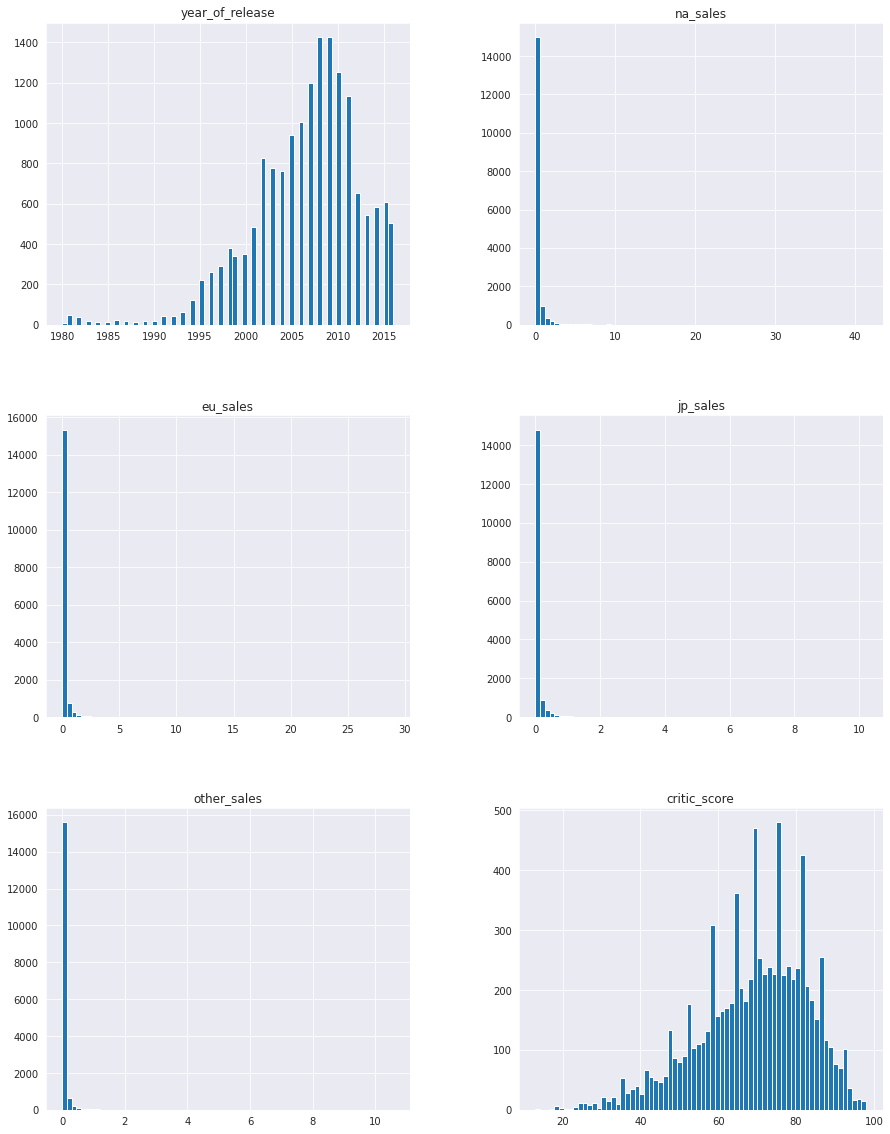

In [5]:
df.hist(bins=70, figsize=(15, 20)) # строим общую гистограмму для всех числовых столбцов таблицы

In [6]:
display(df.isna().sum()) 

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

**Подитог по разделу 1.**<p>
- В исходном файле 16715 строк. Дубликатов нет.   
- В названиях столбцов заменены прописные буквы на строчные.  
- Количество строк в столбцах не совпадают, значит в столбцах name, year_of_release, genre, critic_score, user_score, rating   
есть пропуски. 
- Дубликаты строк не обнаружены.   
- Пропуски в столбцах name, genre заполнить никакими данными мы не сможем, поэтому такие строчки удалим.   
К тому же их немного - 2 строчки.
- Пропуски в столбце year_of_release также удалим, т.к. в анализе основной упор будем делать на год выпуска игры.<br>
- В толбце rating есть значение рейтинг K-A. Такое значение после 1998 года стало   
рейтингом E. Получается, что это одно и тоже и имеет смысл К-А заменить на Е. Кроме того, здесь же присутствует рейтинг RP,   
который не подразумевает никакой оценки, поэтому RP заменим на NaN. 
- Пропуски в стоблцах critic_score,user_score, заменим на -1, а пропуски в столбце rating заменим на unknown, что будет означать, что оценки или рейтинг не получены для данной игры. Заменить средними значениями такие строки не получится, их очень много и это исказит результаты анализа.
- В данных по sales есть несколько строк, которые сильно выделяются из общего массива данных.

## 2. Подготовка данных

***2.1. Изучим набор значений в некоторых столбцах для поиска дубликатов и необычных значений***

In [7]:
df['rating']=df['rating'].str.replace('K-A','E') #замена рейтинга "K-A" на "Е"
df['rating']=df['rating'].replace('RP', 'no_ESRB') #замена рейтинга "RP" на "no_ESRB"
print('Рейтинги:', df['rating'].unique()) #проверка коррекной замены рейтингов столбца rating
print('Повторы игр:', df['name'].duplicated().sum()) #смотрим как часто имена игр повторяются. Неявные дубликаты?
print('Оценки пользователей: ', df['user_score'].unique()) #проверяем значения оценок пользователей.
print('имя:', df['name'].unique())

Рейтинги: ['E' nan 'M' 'T' 'E10+' 'AO' 'EC' 'no_ESRB']
Повторы игр: 5155
Оценки пользователей:  ['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']
имя: ['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']


**2.2. Заменим значения tbd в столбце user_score.**

В оценке пользователей столбца user_score имеется значение tbd. Это значение равносильно отсутствию оценки, т.к. подразумевает,
что оценка будет получена позднее, и в результате настоящей оценки нет. Посмотрим данное значение в разрезе по годам, чтобы 
проверить предположение, что оценка tbd поставлена для игр, которые еще не успели получить оценки пользователей, т.к. недавно 
запущены.

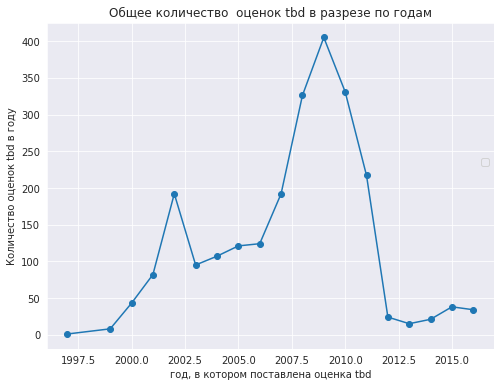

In [8]:
#визуализируем общее оценок tbd в разрезе по годам.
df[df['user_score']=='tbd'].pivot_table(index='year_of_release', values= 'user_score', aggfunc = 'count').\
plot(style='o-', figsize=(8, 6), sharex=False, grid=True)
plt.title('Общее количество  оценок tbd в разрезе по годам')
plt.xlabel('год, в котором поставлена оценка tbd')
plt.ylabel('Количество оценок tbd в году')
plt.legend('', bbox_to_anchor=(1, 0.6))
plt.show()

Как видим, оценка tbd не несет практического смысла, т.к. имеется во всех годах, значит ее можно просто заменить на пропуск NaN.

In [9]:
df['user_score']=df['user_score'].replace("tbd",np.nan) #замена оценки tbd на nan
print(df['user_score'].unique()) #проверяем значения оценок пользователей на отсутствие оценки tbd.

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' '8.8' '6.9' '9.4'
 '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7' '4.1'
 '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3' '4.7'
 '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8' '1.8'
 '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2' '2.3'
 '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


**2.3. Заполянем пропуски значений, часть пропусков удаляем.**

In [10]:
#удаляем строки с пропущенными данными из столбцов 'name', 'genre', т.к. их всего 2
df = df.dropna(subset=['name', 'genre']).reset_index(drop=True)

#также  удаляем строки с пропусками year_of_release, их не более 1,6% (269/16715=0,0161),т.к. для нашего анализа 
#год выпуска игры будет участвовать практически во всех сортировках.меняем тип на int (будут только целые числа)
df = df.dropna(subset=['year_of_release']).reset_index(drop=True)
df['year_of_release'] = df['year_of_release'].astype(int) 

#заполняем пропуски в столбце critic_score на -1, меняем тип на int (будут только целые числа)
df['critic_score'] = df['critic_score'].fillna(-1).astype(int) 

#заполняем пропуски в столбце user_score на -1, меняем тип на float (дробные оценки)
df['user_score'] = df['user_score'].fillna(-1).astype(float) 

#заполним пропуски значением unknown в столбце rating 
df['rating'] = df['rating'].fillna('unknown') 

В визульном анализе было выявлено аномальное значение для платформы DS за 1985 год. 
А по официальным данным платформа DS была запущена в 2004 году. Выясним, с чем связано это значение.

In [11]:
display(df.query('(platform =="DS")&(year_of_release == 1985)&((na_sales>0)or(eu_sales>0)or(jp_sales>0)or(other_sales>0))'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15704,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,-1,-1.0,unknown


Мы выяснили, что в наших данных за 1985 год указаны данные о продажах на платформе DS по региону JP для игры 'Strongest Tokyo University Shogi DS'. Проверим, есть ли еще какие-либо данные по этой игре.

In [12]:
display(df.query('(name =="Strongest Tokyo University Shogi DS")'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15704,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,-1,-1.0,unknown


Запись по игре 'Strongest Tokyo University Shogi DS' только одна. Из открытых источников действительно указывается информация, что данная игра вышла именно в 1985 году и выпускалась на платформе DS. Мы понимаем, что если год выпуска не является ошибочным, то указание платформы DS - это ошибка. Исправить данную ошибку мы не можем, поэтому должны были бы название платформы сделать пропуском (или год выпуска игры). Но так как подобные пропуски в названии платформ мы ранее удаляли, то придется и информацию о данной игре тоже удалить. Какого-либо существенного влияния на результаты анализа всего датасета такое действие не окажет. 

In [13]:
#удаляем данные по игре 'Strongest Tokyo University Shogi DS' 
df = df[df['name']!='Strongest Tokyo University Shogi DS'].reset_index(drop=True) 

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     16443 non-null  int64  
 9   user_score       16443 non-null  float64
 10  rating           16443 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


**2.4. Добавляем столбец с суммарными глобальными продажами по всем регионам**

In [15]:
df['sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1) #добавляем столбец с суммарными продажами

**2.5. Проверим наличие дубликатов строк по значениям столбцов 'name', 'platform', 'year_of_release', 'genre'**

In [16]:
display(df.groupby(['name', 'platform', 'year_of_release', 'genre'])['rating'].count().sort_values(ascending = False)\
        .head())

name                        platform  year_of_release  genre       
Madden NFL 13               PS3       2012             Sports          2
 Beyblade Burst             3DS       2016             Role-Playing    1
Ratatouille                 PC        2007             Action          1
Rapala Tournament Fishing!  X360      2006             Sports          1
Rapala Trophies             PSP       2006             Sports          1
Name: rating, dtype: int64

Есть одна игра с названием Madden NFL 13, у которой данные по 4 столбцам совпадают. Посмотрим, что за данные 
хранятся по данной игре

In [17]:
display(df[((df['name']=='Madden NFL 13')&(df['platform']=='PS3')&(df['year_of_release']==2012)&(df['genre']=='Sports'))])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
600,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83,5.5,E,2.56
15968,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83,5.5,E,0.01



Как видим, строка 16228 полностью повторяет строку 604, за исключеннием незначительных данных по продажам. Удалим вторую строку.

In [18]:
df=df.drop_duplicates(subset=['name', 'platform', 'year_of_release', 'genre']).reset_index(drop=True)
display(df[((df['name']=='Madden NFL 13'))]) #неявных повторов больше нет
df.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
503,Madden NFL 13,X360,2012,Sports,2.53,0.15,0.0,0.17,81,5.8,E,2.85
600,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83,5.5,E,2.56
3933,Madden NFL 13,Wii,2012,Sports,0.47,0.00,0.0,0.03,-1,7.3,E,0.50
5800,Madden NFL 13,PSV,2012,Sports,0.28,0.00,0.0,0.02,63,7.3,E,0.30
6956,Madden NFL 13,WiiU,2012,Sports,0.21,0.00,0.0,0.02,75,6.7,E,0.23


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16442 entries, 0 to 16441
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16442 non-null  object 
 1   platform         16442 non-null  object 
 2   year_of_release  16442 non-null  int64  
 3   genre            16442 non-null  object 
 4   na_sales         16442 non-null  float64
 5   eu_sales         16442 non-null  float64
 6   jp_sales         16442 non-null  float64
 7   other_sales      16442 non-null  float64
 8   critic_score     16442 non-null  int64  
 9   user_score       16442 non-null  float64
 10  rating           16442 non-null  object 
 11  sales            16442 non-null  float64
dtypes: float64(6), int64(2), object(4)
memory usage: 1.5+ MB


**Подитог по разделу 2.**<p>
- После обработки данных осталось 16442 строки. 
- В столбце user_score значение tbd заменено на NaN, т.к. эта оценка относилась не только к последним годам выпуска игр,
а была в данных по всем годам.  
- удалены строки с пропусками year_of_release, т.к. их не более 1,6%. Для нашего анализа год выпуска игры будет участвовать практически во всех сортировках, и важно здесь не иметь пропусков. Тип данных сменили на int, т.к. данные целочисленные.<br>
- В столбце critic_score заменили пропуски значением -1, а тип данных сменили на int, т.к. данные целочисленные.
- В столбце user_score заменили пропуски значением -1, а тип данных сменили на float, т.к. могут быть дробные оценки.
- В столбце rating рейтинг 'RP' заменил на 'no_ESRB', т.к. преполагалось в дальнейшем рейтинг ESRB присвоить. Пропуски заменили на unknown. ESRB - это рейтинг для США и Канады. А значит пропуск не савязан с ошибкой заполнения данных. Возможно игры с пропущенными рейтингами не планировали получать рейтинг от ESRB, т.к. не выпускались для Северной Америки.
- Добавили столбец sales с суммарными продажами каждой игры во всех регионах.
- Выявили одну игру с названием Madden NFL 13, у которой данные по 4 столбцам совпадают. Дополнительные данные из остальных столбцов отличаются только в данных по продажам в самых минимальных значениях, поэтому дубликат удалили.
- Выявлено по результатам визульного анализа аномальное значение для платформы DS за 1985 год. А по официальным данным платформа DS была запущена в 2004 году. Мы выяснили, что в наших данных за 1985 год указаны данные о продажах на платформе DS по региону JP для игры 'Strongest Tokyo University Shogi DS'. Запись по игре 'Strongest Tokyo University Shogi DS' только одна. Из открытых источников действительно указывается информация, что данная игра вышла именно в 1985 году и выпускалась на платформе DS. Мы понимаем, что если год выпуска не является ошибочным, то указание платформы DS - это ошибка. Исправить данную ошибку мы не можем, поэтому должны были бы название платформы (или год выпуска игры) сделать пропуском. Какого-либо существенного влияния на результаты анализа всего датасета удаление этой строки не окажет. Произвели удаление данной строки.

### 3. Исследовательский анализ данных.

**3.1. Посмотрим сколько игр поступало в продажу в разные годы.**

Т.к. одна и та же игра может быт выпущена на разных платформах одновременно (т.е. по одной игре может быть несколько записей в один год), то нам надо очистить данные от таких повторов для разных платформ.
При этом пропущенные года выпуска в фильтрации не задействуем.
Агрегируем данные сначала по году и названию игры, а затем построим диаграмму количества продаваемых игр в каждом году.

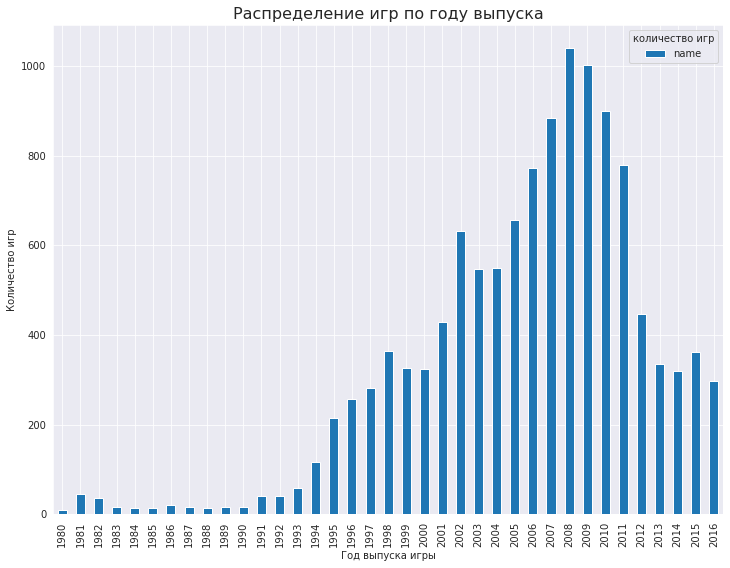

In [20]:
df[['year_of_release', 'name']].drop_duplicates().pivot_table(index='year_of_release', \
    values = 'name', aggfunc = 'count').plot(kind='bar',figsize=(12, 9))
plt.title('Распределение игр по году выпуска', fontsize=16)
plt.xlabel('Год выпуска игры')
plt.ylabel('Количество игр')
plt.legend(title='количество игр')
plt.show()

Распределение приближено к нормальному со смещением влево. Наибольшую ценность имеют данные с 1994 года. До 1994 года выпускалось очень мало игр по сравнению с тем, что было после 1994 года. Наибольшее количество игр в продаже было в 2008 году, а после 2011 года количество игр упало в 2 раза.

**3.2. Выделим платформы с наибольшими продажами и рассмотрим их данные по годам.**

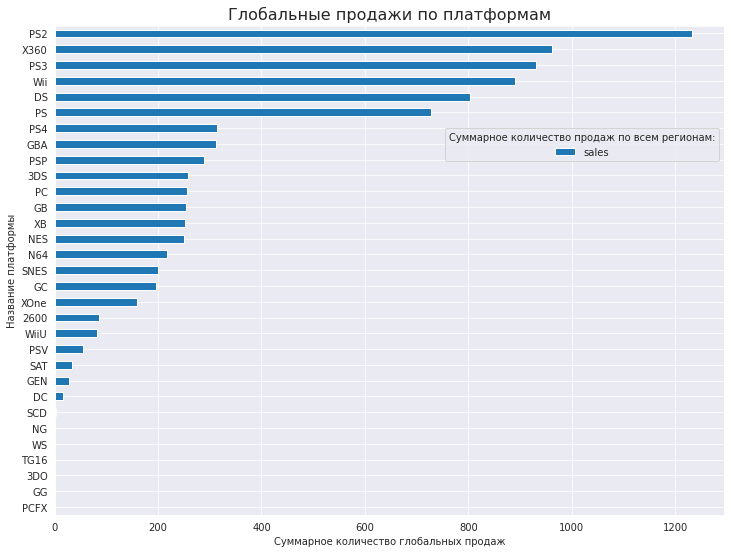

In [21]:
df.pivot_table(index='platform', values='sales', aggfunc = 'sum').sort_values(by= 'sales', ascending = True).\
        plot(kind='barh', figsize=(12, 9))
plt.title('Глобальные продажи по платформам', fontsize=16)
plt.xlabel('Суммарное количество глобальных продаж')
plt.ylabel('Название платформы')
plt.legend(bbox_to_anchor=(1, 0.8), title='Суммарное количество продаж по всем регионам:')
plt.show()

**Далее рассмотрим следующие платформы, как наиболее успешные с точки зрения суммарных продаж, в разрезе по годам:**
PS2, X360, PS3, Wii, DS, PS, GBA, PS4, PSP, PC, 3DS, XB, GB, NES, N64, SNES, GC, XOne, 2600, WiiU, PSV, SAT, GEN, DC.

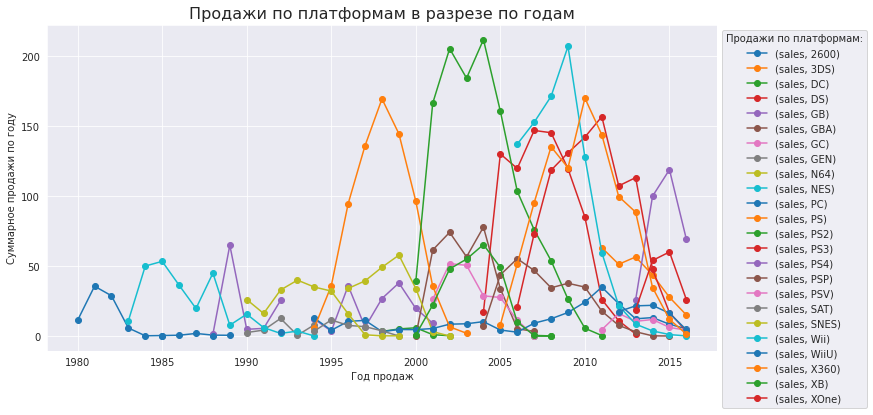

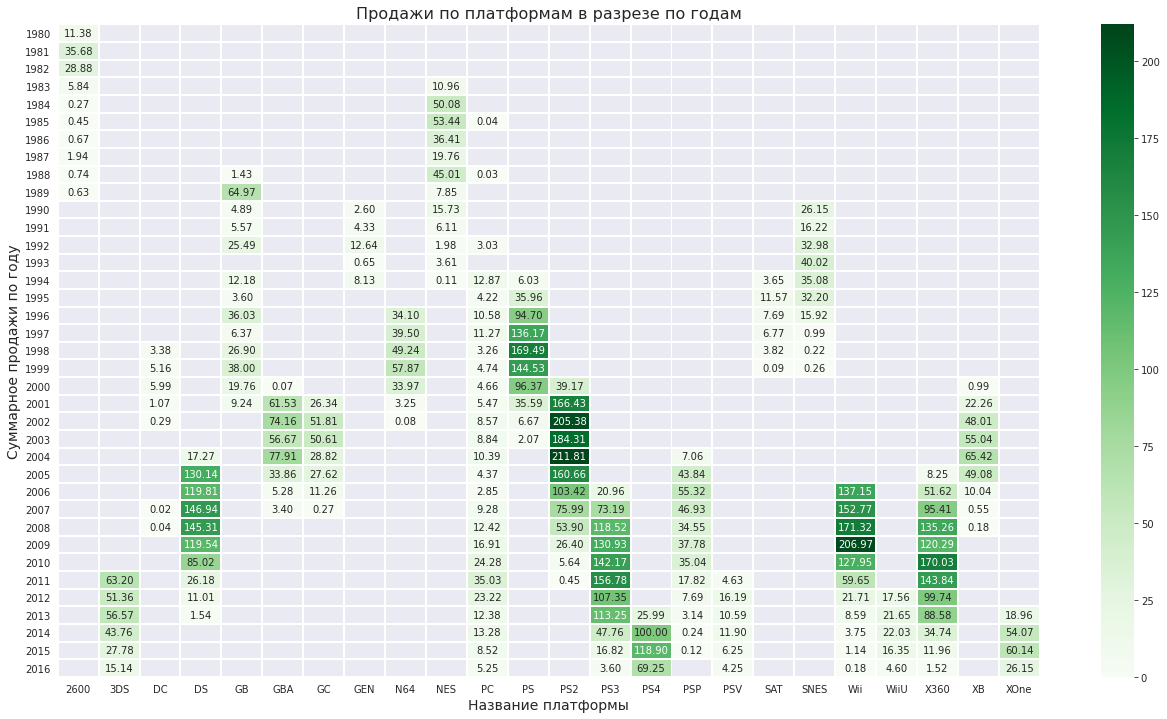

In [22]:
most_success_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC', '3DS', 'XB', 'GB', 'NES', \
                     'N64', 'SNES', 'GC', 'XOne', '2600', 'WiiU', 'PSV', 'SAT', 'GEN', 'DC']
#выведем график продаж по наиболее успешным платформам в разрезе по годам
df.query('(platform in @most_success_platforms)').pivot_table(index='year_of_release',\
 columns = 'platform', values = ['sales'], aggfunc = 'sum').plot(style='o-', figsize=(12, 6), sharex=False, grid=True) 
plt.title('Продажи по платформам в разрезе по годам', fontsize=16)
plt.xlabel('Год продаж')
plt.ylabel('Суммарное продажи по году')
plt.legend(bbox_to_anchor=(1, 1), title='Продажи по платформам:')
plt.show()

#Дополнительно выведем в табличной форме распределение количества продаж по платформам в разрезе по годам
plt.figure(figsize=(22,12))
sns.heatmap(df.query('(platform in @most_success_platforms)').pivot_table(index=['year_of_release'],\
        columns = 'platform', values = ['sales'], aggfunc = 'sum')['sales'], linewidths=1, annot=True, fmt='.2f', vmin=0, \
            cmap="Greens")
plt.title('Продажи по платформам в разрезе по годам', fontsize=16)
plt.xlabel('Название платформы', fontsize=14)
plt.ylabel('Суммарное продажи по году', fontsize=14)
plt.show()

**3.3. Выясним, сколько лет существуют платформы.**

In [23]:
df[['platform', 'year_of_release']].drop_duplicates().pivot_table(index='platform', \
    values = 'year_of_release', aggfunc = 'count').describe()

,year_of_release
count,31.000000
mean,7.645161
std,5.063256
min,1.000000
25%,4.000000
50%,7.000000
75%,10.500000
max,26.000000


,year_of_release
platform,
2600,10
3DO,2
3DS,6
DC,7
DS,10
GB,13
GBA,8
GC,7
GEN,5


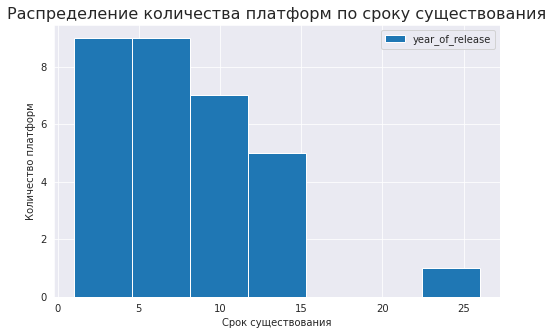

In [24]:
display(df[['platform', 'year_of_release']].drop_duplicates().pivot_table(index='platform', \
    values = 'year_of_release', aggfunc = 'count'))

df[['platform', 'year_of_release']].drop_duplicates().pivot_table(index='platform', \
    values = 'year_of_release', aggfunc = 'count').plot(kind='hist', bins=7, figsize=(8, 5), sharex=False, grid=True)
plt.title('Распределение количества платформ по сроку существования', fontsize=16)
plt.xlabel('Срок существования')
plt.ylabel('Количество платформ')
plt.show()

В данном случае распредление срока жизни платформ напоминает пуасоновское распределение.  
Как видно из расчетных данных медиана среднего срока жизни платформы составляет 7 лет.   
Явные всплески продаж появлялись после выхода игр в 1998, 2004, 2009, 2015 годах, что позволяло получать 
наибольшую выручку по отрасли.   
Получается средний срок смены предпочтений (технологий/подходов) в отрасли 5-6 лет или 5,5 лет в среднем. Последняя   популярная платформа PS4 начала свое восхождение в 2013 году, поэтому актуальный период я бы взял с 2013 года по текущий 2016 год. Далее будем поводить анализ по играм, выпущенным начиная с 2013 года.

На 2016 год имеем 31 платформу за 26 лет существования отрасли. Получается в среднем каждый год появлялась одна новая 
платформа   
(31/26=1,19 шт.).

**3.4. Выясним, какие платформы лидируют по продажам, растут или падают.**

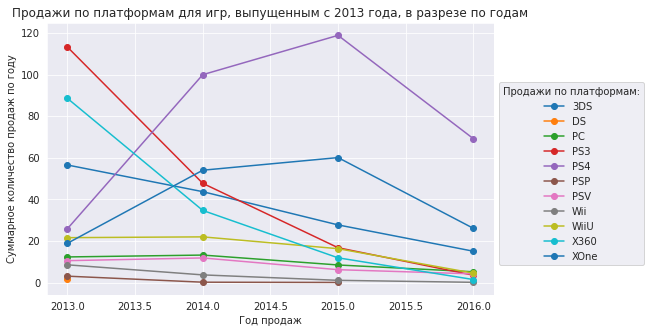

'Количество продаж на платформах по играм, выпущенным в 2013-2016 годах:'

,sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


In [25]:
#выведем продажи по платформам для игр, выпущенным с 2013 года.
df.query('(platform in @most_success_platforms)&(year_of_release > 2012)').pivot_table(index='year_of_release',\
 columns = 'platform', values = 'sales', aggfunc = 'sum').plot(style='o-', figsize=(8, 5), sharex=False, grid=True) 
plt.title('Продажи по платформам для игр, выпущенным с 2013 года, в разрезе по годам')
plt.xlabel('Год продаж')
plt.ylabel('Суммарное количество продаж по году')
plt.legend(bbox_to_anchor=(1, 0.8), title='Продажи по платформам:')
plt.show()
display('Количество продаж на платформах по играм, выпущенным в 2013-2016 годах:', \
    df.query('(platform in @most_success_platforms)&(year_of_release > 2012)').pivot_table(index='platform', \
    values = 'sales', aggfunc = 'sum').sort_values(by='sales', ascending=False))

Продажи по всем платформам падают в 2016 году по сравнению с 2015 годом. По играм, выпущенным в период 2013-2016 годов, продажи велись по следующим платофрмам в порядке убывания количества продаж: PS4, PS3, XOne, 3DS, X360, WiiU, PC, PSV, Wii, PSP, DS. 

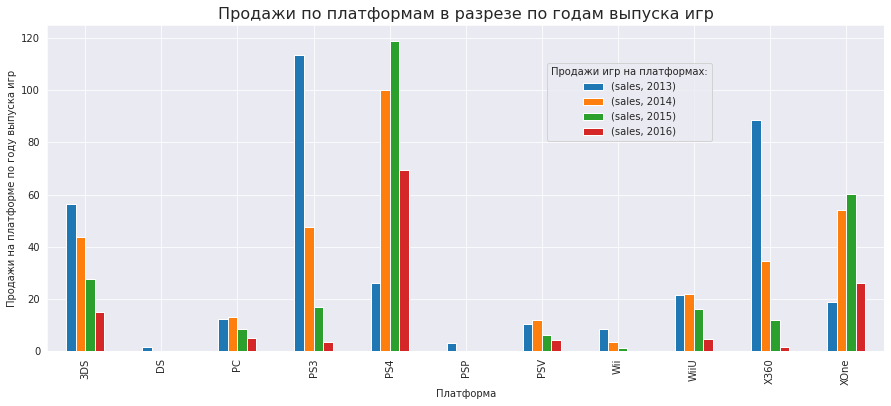

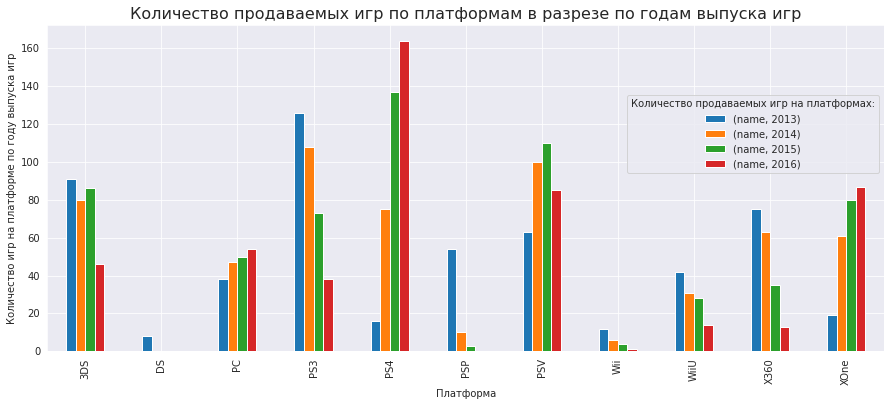

In [26]:
#Динамика продаж на платформах по годам выпуска игр
df.query('(year_of_release > 2012)').pivot_table(index=['platform','year_of_release'], values='sales', \
    aggfunc='sum').unstack().plot(kind='bar', width=0.5, figsize=(15,6))

plt.title('Продажи по платформам в разрезе по годам выпуска игр', fontsize=16)
plt.xlabel('Платформа')
plt.ylabel('Продажи на платформе по году выпуска игр')
plt.legend(bbox_to_anchor=(0.8, 0.9), title='Продажи игр на платформах:')
plt.show()


#Динамика количества игр на платформах по годам выпуска игр
df.query('(year_of_release > 2012)')\
 .pivot_table(index=['platform','year_of_release'], values='name', aggfunc='count').unstack()\
  .plot(kind='bar', width=0.5, figsize=(15,6))
plt.title('Количество продаваемых игр по платформам в разрезе по годам выпуска игр', fontsize=16)
plt.xlabel('Платформа')
plt.ylabel('Количество игр на платформе по году выпуска игр')
plt.legend(bbox_to_anchor=(1, 0.8), title='Количество продаваемых игр на платформах:')
plt.show()

Динамика количества игр на каждой из платформ в разрезе по годам выпуска игр показывает, что только на платформах PS4, XOne, PC имеется положительная динамика по количеству появляющихся новых игр. На остальных платформах наблюдаем снижение количества новых игр. При этом продажи на платформах PS4, XOne, 3DS по играм выпущенным в 2015 и 2016 годах, несмотря на падение продаж, намного опережают продажи всех остальных платформ.    <br>

**3.5. Рассмотрим глобальные продажи игр, выпущенных в 2013-2016 года.**  



Text(0, 0.5, 'Продажи 1 игры на платформе')

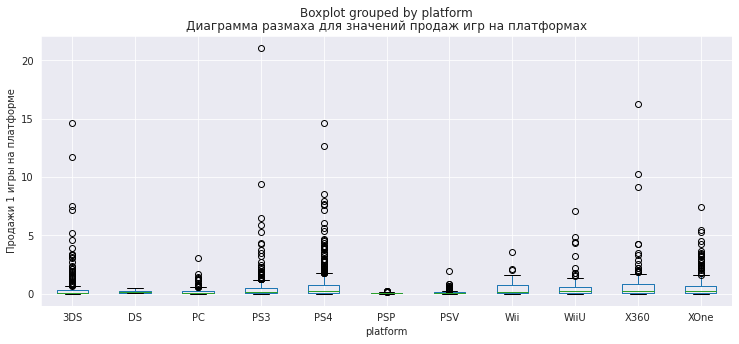

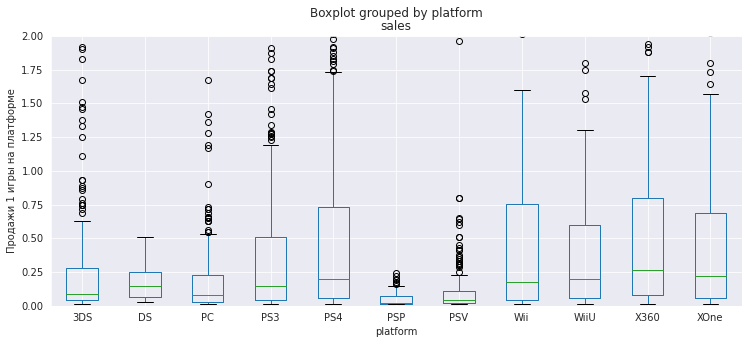

In [27]:
#построим график "ящик с усами" для оценки разброса в продажах игр на платформах:
df[['year_of_release', 'name', 'platform', 'sales']].query('(year_of_release > 2012)').pivot_table(index=['name', 'platform'],\
 values = 'sales', aggfunc = 'sum').reset_index().boxplot(column='sales', by='platform', figsize=(12, 5))
plt.ylabel('Продажи 1 игры на платформе')
plt.title('Диаграмма размаха для значений продаж игр на платформах')

#более детально посмотрим на значения медиан в продажах на платформах:
df[['year_of_release', 'name', 'platform', 'sales']].query('(year_of_release > 2012)').pivot_table(index=['name', 'platform'],\
 values = 'sales', aggfunc = 'sum').reset_index().boxplot(column='sales', by='platform', figsize=(12, 5))
plt.ylim([0,2])
plt.ylabel('Продажи 1 игры на платформе')

На диаграмме размаха для продаж игр на платформах можно увидеть, что  верхняя граница значимой части продаж на платформах PS4, X360, Wii, 
XOne сильно отличается от остальных платформ. Это означает, что на этих платформах гораздо больше игр с более высокими 
показателями продаж. Также эта группа платформ имеет более высокие показатели третьего квартиля, медианы продаж, чем другие 
платформы. <br>
Вторая группа платформ по размаху, третьему квартилю и медиане: WiiU, PS3. И затем идут все остальные платформы.   
В совокупности это значит, что в средняя игра на X360, XOne, PS4 продается в большем количестве, чем на других платформах.  Также можно отметить, что у многих платформ есть свои отдельные фавориты, которые имеют сильные выбросы в количестве продаж 
по отношению к основной массе игр. Особенно выделяется 1 игра на PS3 с продажами более 20 млн.копий, которая оказалась самой 
продаваемой среди всех остальных игр (2013-2016 гг.) на отдельно взятых платформах.  
Все выбросы лучше оставить, т.к. все эти данные важны для дальнейшей аналитики.  <br> 
<br>  
В итоге, если учитывать продажи игр последних лет, позитивную динамику количества игр на платформах, медианные значения продаж, и другие показатели диаграммы размаха, самыми перспективными и прибыльными платформами являются PS4 и XOne. </b>


Text(0.5, 0, 'Игра')

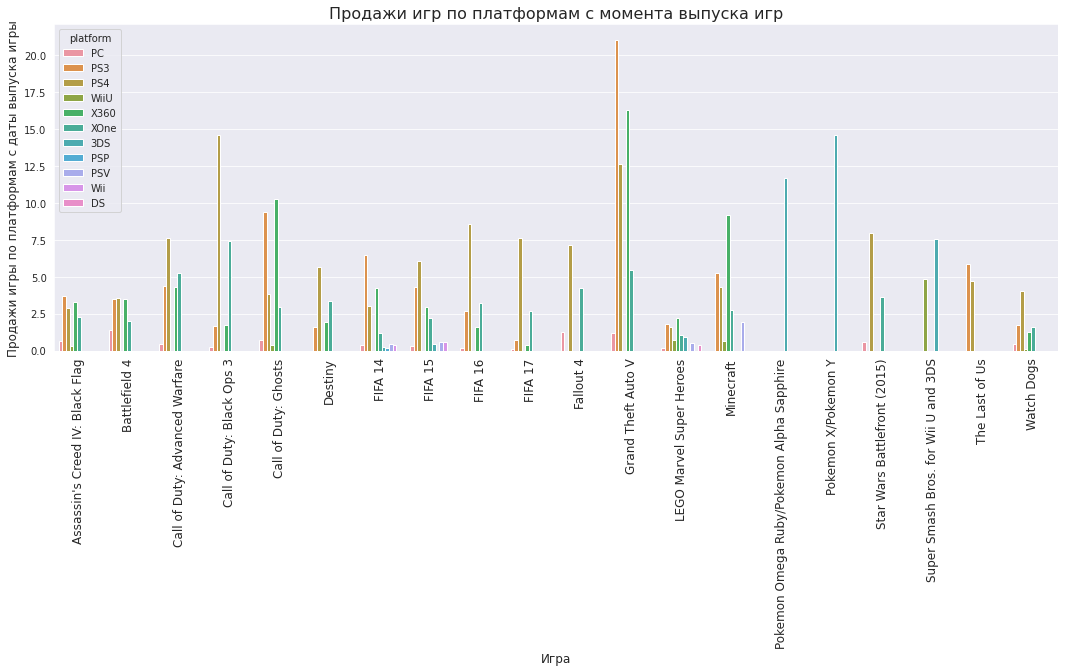

In [28]:
#Посмотрим распределение продаж игр по платформам 

#Создаем список самых популярных игр по продажам (отберем первых 20 шт, т.к. все вместе на диаграмму не поместить)
games = df.query('(year_of_release > 2012)').pivot_table(index=['name'], columns='platform', values='sales',\
     aggfunc='sum')
games['t_sales'] = games.loc[:, '3DS':'XOne'].sum(axis = 1)
games_toplist = games.sort_values(by='t_sales', ascending=False).reset_index().head(20)['name']

#строим диаграмму распределения продаж игр по платформам
fig, axis = plt.subplots(1,1, figsize=(18,6))
g=sns.barplot(x='name', y='sales', hue='platform', data=df.query('(year_of_release > 2012)&(name in @games_toplist)')\
            .pivot_table(index=['name', 'platform'], values='sales', aggfunc='sum').reset_index())
g.set_title('Продажи игр по платформам с момента выпуска игр', fontsize=16)
g.set_xticklabels(g.get_xticklabels(), rotation=90, fontsize=12)
g.set_ylabel('Продажи игры по платформам c даты выпуска игры', fontsize=12)
g.set_xlabel('Игра', fontsize=12)

Среди игр резко выделяются несколько мультиплатформенных игр, имеющих самые большие продажи: "Grand Theft Auto V" (жанр Action), 
"Call of Duty: Black Ops 3" (жанр Shooter), "Call of Duty: Ghosts"(жанр Shooter), "Minecraft"(жанр Misc), 
а также 2 моноплатформенных игры "Pokemon X/Pokemon Y"(жанр Role-Playing), "Pokemon Omega Ruby/Pokemon Alpha Sapphire"
(жанр Role-Playing).

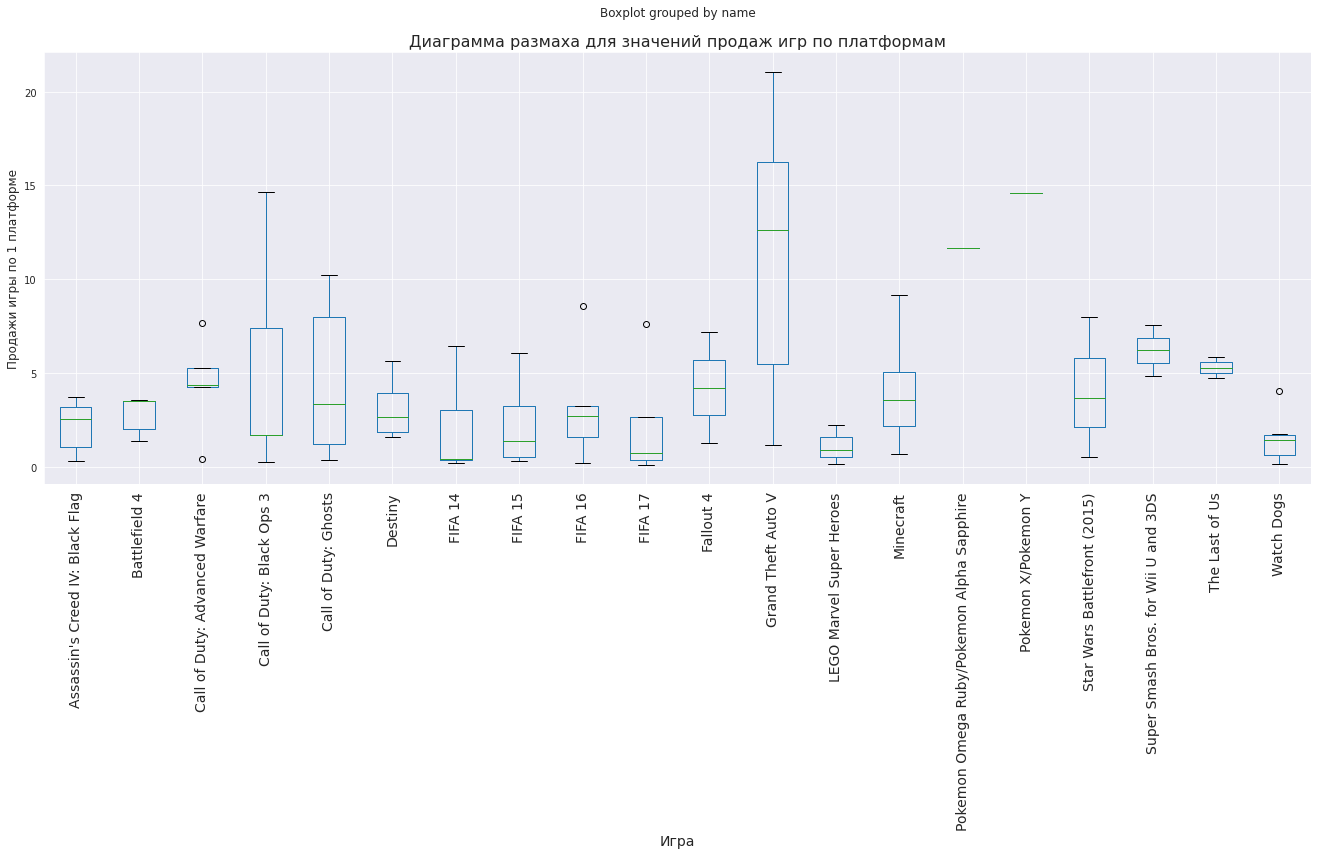

In [29]:
#также построим график "ящик с усами" для оценки разброса в продажах самых продаваемых игр по платформам:
df[['year_of_release', 'name', 'platform', 'sales']].query('(year_of_release > 2012)&(name in @games_toplist)')\
   .pivot_table(index=['name', 'platform'], values = 'sales', aggfunc = 'sum').reset_index().boxplot(column='sales',\
                                                                                by='name', figsize=(22, 8))
plt.title('Диаграмма размаха для значений продаж игр по платформам', fontsize=16)
plt.ylabel('Продажи игры по 1 платформе', fontsize=12)
plt.xticks(rotation=90, fontsize=14)
plt.xlabel('Игра', fontsize=14)
plt.show()

На диаграмме размаха для значений продаж игр по платформам можно увидеть, что верхняя граница значимой части продаж игр: "Grand Theft Auto V" (жанр Action), "Call of Duty: Black Ops 3" (жанр Shooter), "Call of Duty: Ghosts"(жанр Shooter), "Minecraft"(жанр Misc) сильно отличается от остальных игр. 
 Также эта группа игр имеет более высокие показатели третьего квартиля, медианы продаж, чем другие игры. Явным лидером выступает игра "Grand Theft Auto V" (жанр Action).<br>
В совокупности это значит, что средняя платформа продаст игры "Grand Theft Auto V" (жанр Action), "Call of Duty: Black Ops 3" (жанр Shooter), "Call of Duty: Ghosts"(жанр Shooter), "Minecraft"(жанр Misc) в большем количестве, чем какие-либо другие игры.<br>
Также можно отметить, что выбросов значений продаж игр по платформам практически нет.<br>
    Игры "Pokemon X/Pokemon Y"(жанр Role-Playing) и "Pokemon Omega Ruby/Pokemon Alpha Sapphire"(жанр Role-Playing) являются 
моноплатформенными, поэтому ожидаемо медиана у этих игр расположено высоко. Однако это не имеет в данном срезе большого значения.

**3.6. Посмотрим, как влияют на продажи внутри одной, наиболее популярной платформы PS4 отзывы пользователей и критиков. 
Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Посмотрим также для сравнения еще несколько платформ.**

Text(114.0, 0.5, 'Название платформы')

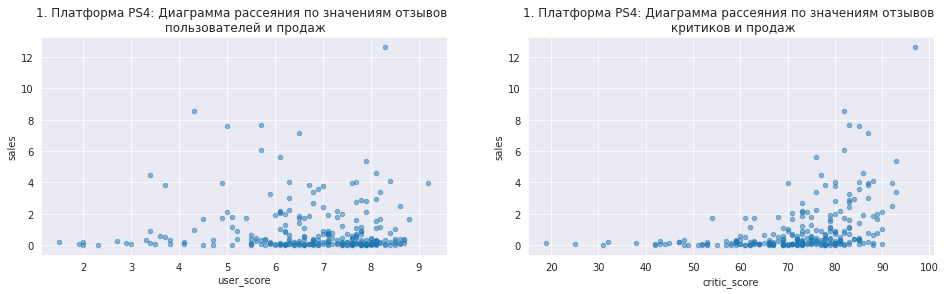

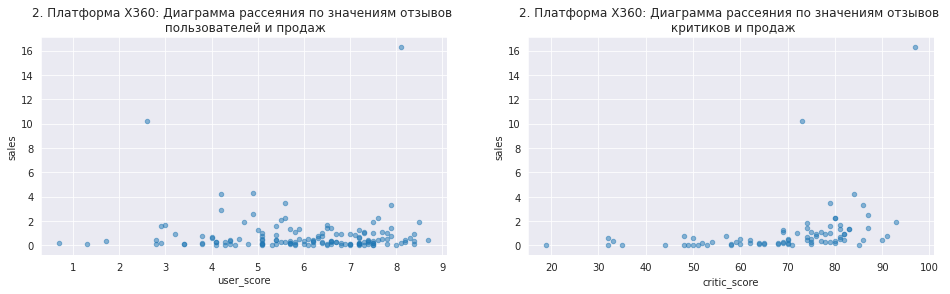

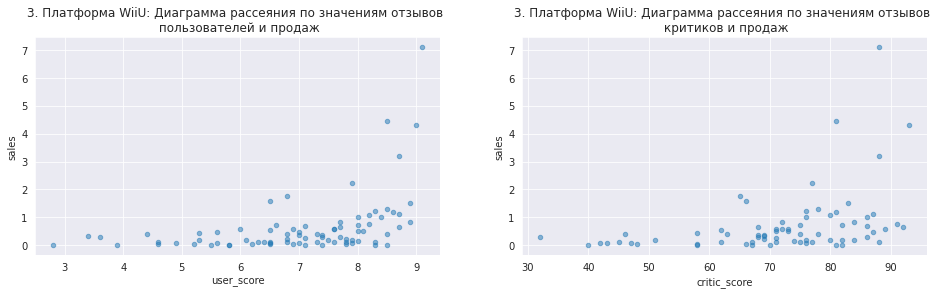

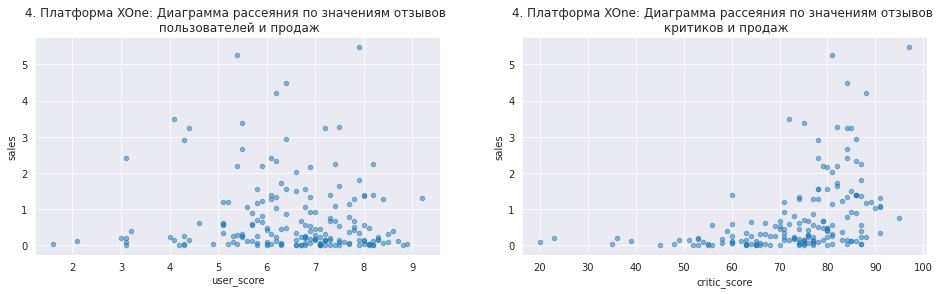

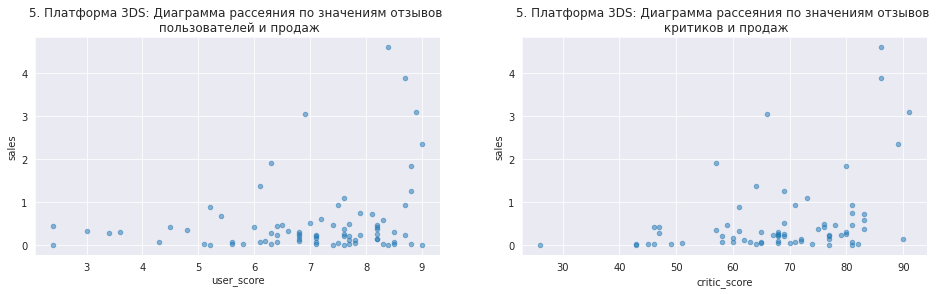

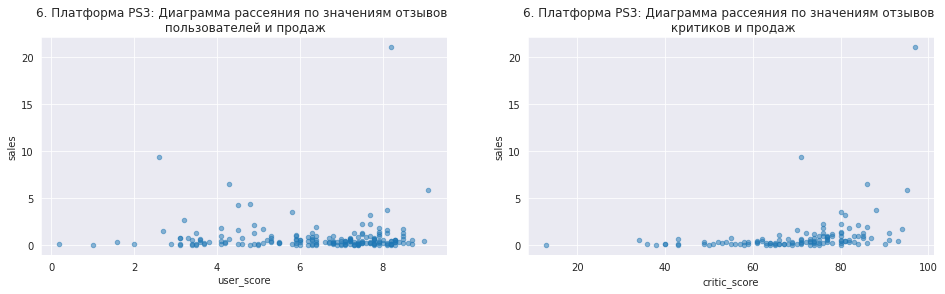

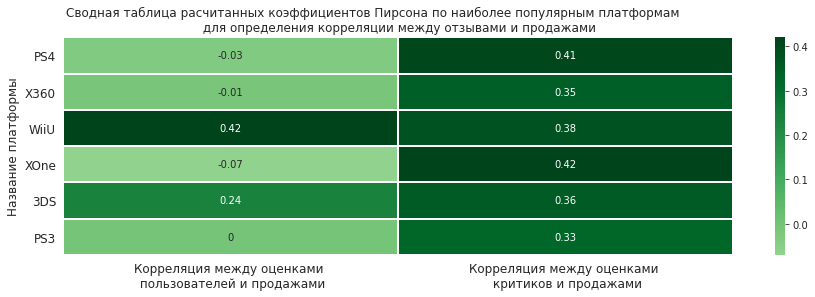

In [30]:
#Изучим зависимость количества продаж от отзывов пользователей и критиков по играм 2013-2016 гг. на платформе PS4
#и нескольким другим популярным платформам:'X360', 'WiiU', 'XOne', '3DS', 'PS3'.

#перечень наиболее популярных платформ, для которых будем изучать зависимость количества продаж от отзывов пользователей и 
#критиков
sales_corr = pd.DataFrame(data = {'sales_on_platforms' : ['PS4','X360', 'WiiU', 'XOne', '3DS', 'PS3']})
s=0
user=[]
critic=[]

for i in sales_corr['sales_on_platforms']:
    fig, axis = plt.subplots(1,2, figsize=(16,4))
    s+=1
   
    #диаграмма рассеяния по значениям отзывов пользователей и продаж по каждой платформе
    df.query('(platform == @i)&(year_of_release > 2012)&(user_score >= 0)')\
    .plot(x='user_score', y='sales', kind='scatter', alpha=0.5, ax=axis[0])
    axis[0].set_title(str(s)+'. Платформа '+i+': Диаграмма рассеяния по значениям отзывов \n пользователей и продаж', \
                      fontsize=12)
       
    #диаграмма рассеяния значениям отзывов критиков и продаж по каждой платформе    
    df.query('(platform == @i)&(year_of_release > 2012)&(critic_score >= 0)')\
    .plot(x='critic_score', y='sales', kind='scatter', alpha=0.5, ax=axis[1])
    axis[1].set_title(str(s)+'. Платформа '+i+': Диаграмма рассеяния по значениям отзывов \n критиков и продаж', fontsize=12)
   
    #рассчитываем и записываем коэффициенты Пирсона для определения корреляции между отзывами и продажами по каждой платформе   
    user[len(user):]= [round(df.query('(platform == @i)&(year_of_release > 2012)&(user_score >= 0)')['user_score'].\
            corr(df.query('(platform == @i)&(year_of_release > 2012)&(user_score >= 0)')['sales']), 2)]
    critic[len(critic):] = [round(df.query('(platform == @i)&(year_of_release > 2012)&(critic_score >= 0)')['critic_score'].\
            corr(df.query('(platform == @i)&(year_of_release > 2012)&(critic_score >= 0)')['sales']), 2)]
    


#формируем сводную таблицу рассчитанных коэффициентов Пирсона и выводим heatmap
sales_corr['user_corr'] = user
sales_corr['critic_corr'] = critic

fig, axis = plt.subplots(1,1, figsize=(15,4))
g=sns.heatmap(sales_corr[['user_corr', 'critic_corr']], linewidths=1, annot=True, fmt='.2g', cmap="Greens", 
                       yticklabels=sales_corr['sales_on_platforms'], xticklabels=\
    ['Корреляция между оценками \n пользователей и продажами', 'Корреляция между оценками \n критиков и продажами'], center= 0)
g.set_title('Сводная таблица расчитанных коэффициентов Пирсона по наиболее популярным платформам \
            \n для определения корреляции между отзывами и продажами', \
            fontsize=12)
g.set_xticklabels(g.get_xticklabels(), fontsize=12)
g.set_yticklabels(g.get_yticklabels(), rotation=0, fontsize=12)
g.set_ylabel('Название платформы', fontsize=12)

Для платформы PS4:
Получаем корреляцию отзывов пользователей и продаж в размере -0,03 - связь очень слабая отрицательная.  
Получаем корреляцию отзывов критиков и продаж в размере 0,41 - связь средняя положительная.  
Намного важнее получить оценки критиков, чем оценки пользователей, которые на продажи не влияют. 

*Получена итоговая сводная таблица расчитанных коэффициентов Пирсона по наиболее популярным платформам для определения корреляции между отзывами и продажами. <br> 
    Основанный на расчетах коэффициентов Пирсона вывод о том, что связь отзывов пользователей и продаж очень слабая, а связь отзывов критиков и продаж - средняя положительная, подтверждается для остальных платформ 'PS4','X360', 'XOne', '3DS', 'PS3', за исключением платформы 'WiiU',
по которой корреляция отзывов пользователей и продаж в размере 0,42 оказалась средней положительной.*

**3.7. Построим распределение игр, выпущенных в период 2013-2016 годов, по жанрам**

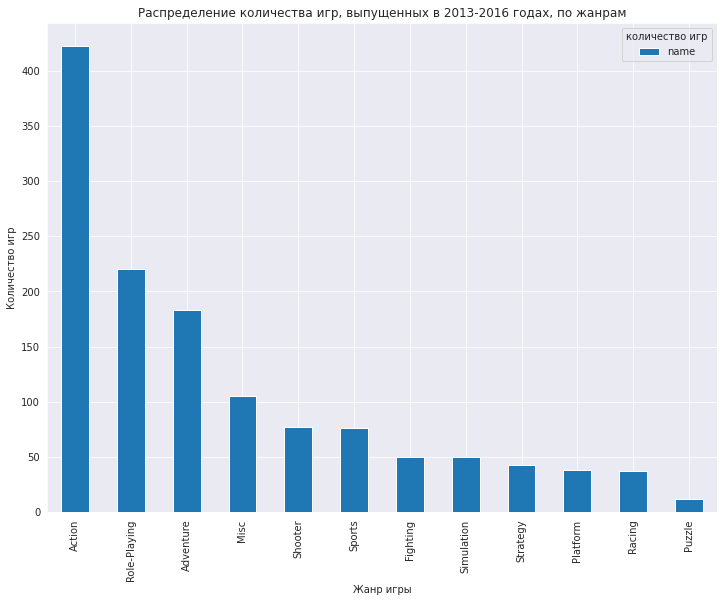

In [31]:
df[['name', 'genre', 'year_of_release']].query('year_of_release > 2012').drop_duplicates(subset=['name', 'genre', \
    'year_of_release']).pivot_table(index='genre', values='name', aggfunc = 'count')\
     .sort_values(by = 'name', ascending = False).plot(kind='bar',figsize=(12, 9))
plt.title('Распределение количества игр, выпущенных в 2013-2016 годах, по жанрам')
plt.xlabel('Жанр игры')
plt.ylabel('Количество игр')
plt.legend(title='количество игр')
plt.show()

Наибольшее количество игр выпущено в жанрах: Action, Role-Playing, Adventure, Misc, Shooter, Sports.   
Наименее количество игр выпущено в жанрах: Pazzle, Racing, Platform, Strategy.      
    
  
Определим  жанры с наибольшими и наименьшими продажами.  

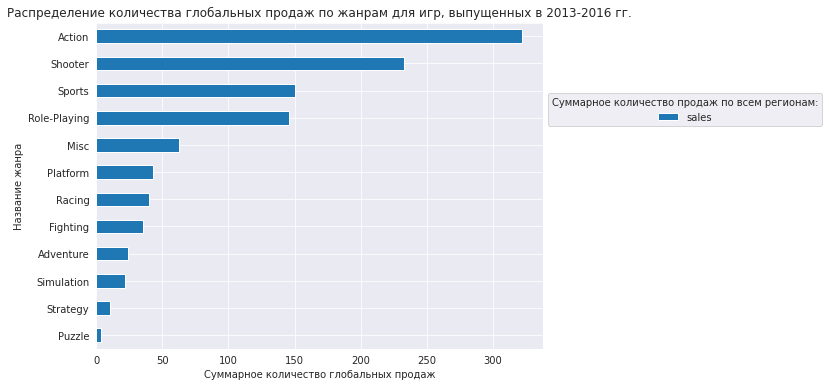

In [32]:
df[['genre', 'year_of_release', 'sales']].query('year_of_release > 2012').pivot_table(index='genre', values='sales', \
    aggfunc = 'sum').sort_values(by = 'sales', ascending = True).plot(kind='barh', figsize=(8, 6))
plt.title('Распределение количества глобальных продаж по жанрам для игр, выпущенных в 2013-2016 гг.')
plt.xlabel('Суммарное количество глобальных продаж')
plt.ylabel('Название жанра')
plt.legend(bbox_to_anchor=(1, 0.8), title='Суммарное количество продаж по всем регионам:')
plt.show()

Жанры с самыми высокими продажами для игр, выпущенных в 2013-2016 гг.: Action, Shooter, Sports, Role-Playing, Misc.  
Жанры с самыми низкими продажами для игр, выпущенных в 2013-2016 гг.: Pazzle, Strategy, Simulation, Adventure, Fighting.

Для анализа прибыльности жанров рассмотрим медианные значения продаж по жанрам в разрезе по платформам.

platform,median_sales,total_sales
genre,,
Shooter,20.815,232.98
Action,14.750,321.87
Role-Playing,10.230,145.89
Misc,7.100,62.82
Racing,6.460,39.89
Fighting,2.550,35.31
Platform,2.195,42.63
Sports,2.080,150.65
Adventure,1.920,23.64


Text(0.5, 0, 'Жанры')

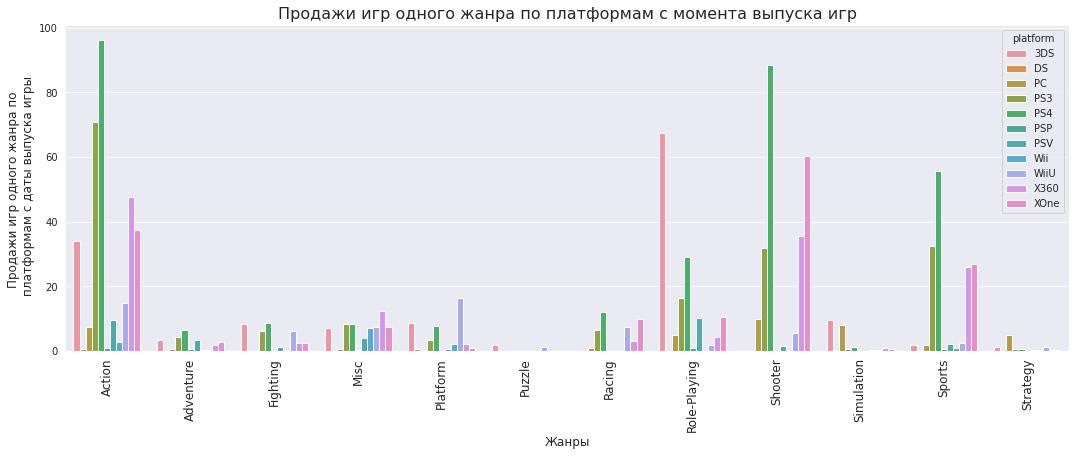

In [33]:
#Посмотрим распределение продаж игр одного жанра  по платформам 

#Создаем список жанров и считаем медиану продаж игр одного жанра  по платформам
genres = df.query('(year_of_release > 2012)').pivot_table(index=['genre'], columns='platform', values='sales',\
     aggfunc='sum')
genres['total_sales'] = genres.loc[:, '3DS':'XOne'].sum(axis = 1)
genres['median_sales'] = genres.loc[:, '3DS':'XOne'].median(axis = 1)
genres_toplist = genres.sort_values(by='total_sales', ascending=False).reset_index()['genre']
display(genres.sort_values(by='median_sales', ascending=False)[['median_sales', 'total_sales']])


#строим диаграмму распределения продаж игр одного жанра по платформам
fig, axis = plt.subplots(1,1, figsize=(18,6))
g=sns.barplot(x='genre', y='sales', hue='platform', data=df.query('(year_of_release > 2012)&(genre in @genres_toplist)')\
            .pivot_table(index=['genre', 'platform'], values='sales', aggfunc='sum').reset_index())
g.set_title('Продажи игр одного жанра по платформам с момента выпуска игр', fontsize=16)
g.set_xticklabels(g.get_xticklabels(), rotation=90, fontsize=12)
g.set_ylabel('Продажи игр одного жанра по \n платформам c даты выпуска игры', fontsize=12)
g.set_xlabel('Жанры', fontsize=12)

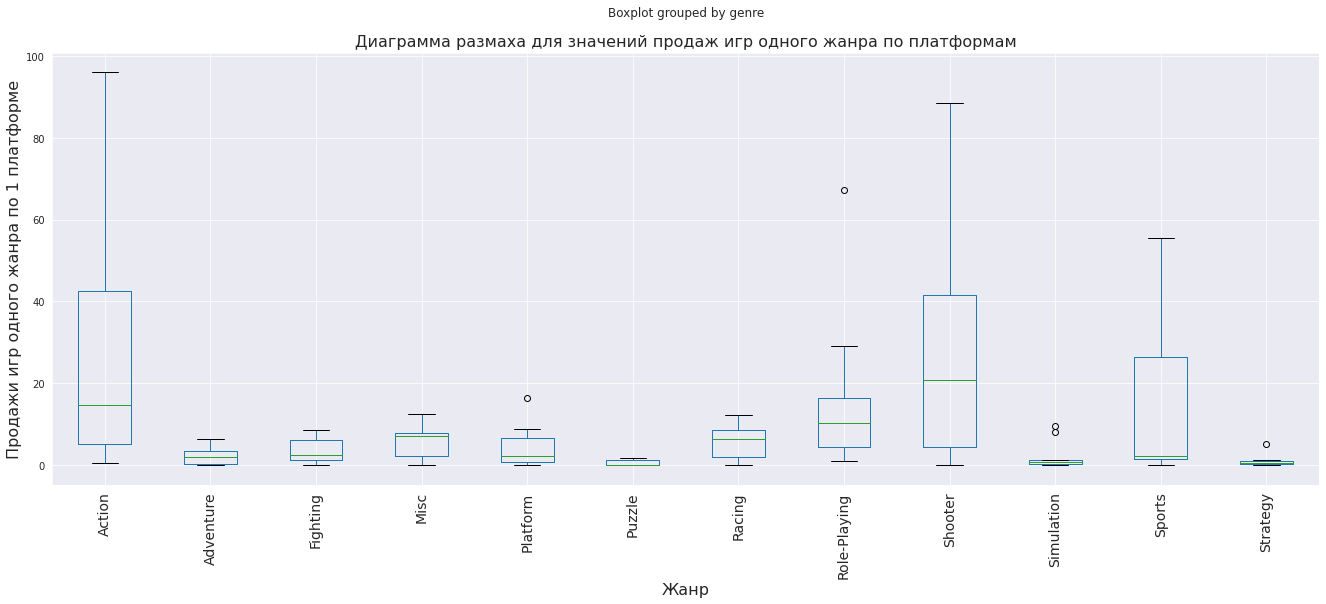

In [34]:
#также построим график "ящик с усами" для оценки разброса в продажах игр одного жанра по платформам:
df[['year_of_release', 'genre', 'platform', 'sales']].query('(year_of_release > 2012)&(genre in @genres_toplist)')\
   .pivot_table(index=['genre', 'platform'], values = 'sales', aggfunc = 'sum').reset_index().boxplot(column='sales',\
                                                                                by='genre', figsize=(22, 8))
plt.title('Диаграмма размаха для значений продаж игр одного жанра по платформам', fontsize=16)
plt.ylabel('Продажи игр одного жанра по 1 платформе', fontsize=16)
plt.xticks(rotation=90, fontsize=14)
plt.xlabel('Жанр', fontsize=16)
plt.show()

- Среди жанров резко выделяются два: жанр Action и жанр Shooter. Вторая группа - жанр Role-Playing и жанр 
Sports.<br>
<br>
    На диаграмме размаха для значений продаж игр одного жанра по платформам можно увидеть, что верхняя граница значимой части продаж игр в жанрах: Action и Shooter сильно отличается от остальных игр. 
Также эта группа жанров игр имеет более высокие показатели третьего квартиля, медианы продаж, чем иры других жанров.  Медиана чуть выше у жанра Shooter.
В совокупности это значит, что средняя платформа продаст игры в жанрах Action и Shooter в большем количестве, чем какие-либо другие игры в других жанрах.
Также можно отметить, что выбросов значений продаж игр одного жанра по платформам практически нет.<br>

**Подитог по разделу 3.**  
- Распределение продаж игр по годам приближено к нормальному со смещением влево. Наибольшую ценность имеют данные с 1994 года.  До 1994 года выпускалось очень мало игр по сравнению с тем, что было после 1994 года. Наибольшее количество игр в продаже     
было в 2008 году, а после 2011 года количество игр упало в 2 раза. 
<br>    

- Выделены наиболее успешные платформы по размеру продаж: PS2, X360, PS3, Wii, DS, PS, GBA, PS4, PSP, PC, 3DS, XB, GB, NES, N64, SNES, GC, XOne, 2600, WiiU, PSV, SAT, GEN, DC. Наблюдаемое распредление срока жизни платформ напоминает пуасоновское распределение.  
Как видно из расчетных данных медиана среднего срока жизни платформы составляет 7 лет.    
Явные всплески продаж появлялись после выхода игр в 1998, 2004, 2009, 2015 годах, что позволяло получать наибольшую выручку по отрасли.   
Получается средний срок смены предпочтений (технологий/подходов) в отрасли 5-6 лет или 5,5 лет в среднем. Последняя популярная платформа PS4 начала свое восхождение в 2013 году, поэтому актуальный период был принят с 2013 года по текущий 2016 год.   
Весь последующий анализ поведен по играм, выпущенным начиная с 2013 года.   
На 2016 год имеем 31 платформу за 26 лет существования отрасли. Получается в среднем каждый год появлялась одна новая платформа
(31/26=1,19 шт.).    
<br>    

- Продажи по всем платформам падают в 2016 году по сравнению с 2015 годом. По играм, выпущенным в период 2013-2016 годов, продажи велись по следующим платофрмам в порядке убывания количества продаж: PS4, PS3, XOne, 3DS, X360, WiiU, PC, PSV, Wii, PSP, DS.  
Динамика количества игр на каждой из платформ в разрезе по годам выпуска игр показывает, что только на платформах PS4, XOne, PC имеется положительная динамика по количеству появляющихся новых игр. На остальных платформах наблюдаем снижение количества новых игр. При этом продажи на платформах PS4, XOne, 3DS по играм выпущенным в 2015 и 2016 годах, несмотря на падение продаж, намного опережают продажи всех остальных платформ.    <br>

- На диаграмме размаха для продаж игр на платформах можно увидеть, что  верхняя граница значимой части продаж на платформах PS4, X360, Wii, 
XOne сильно отличается от остальных платформ. Это означает, что на этих платформах гораздо больше игр с более высокими 
показателями продаж. Также эта группа платформ имеет более высокие показатели третьего квартиля, медианы продаж, чем другие 
платформы. <br>
Вторая группа платформ по размаху, третьему квартилю и медиане: WiiU, PS3. И затем идут все остальные платформы.   
В совокупности это значит, что в средняя игра на X360, XOne, PS4 продается в большем количестве, чем на других платформах.  Также можно отметить, что у многих платформ есть свои отдельные фавориты, которые имеют сильные выбросы в количестве продаж 
по отношению к основной массе игр. Особенно выделяется 1 игра на PS3 с продажами более 20 млн.копий, которая оказалась самой 
продаваемой среди всех остальных игр (2013-2016 гг.) на отдельно взятых платформах.  
Все выбросы лучше оставить, т.к. все эти данные важны для дальнейшей аналитики.  <br> 
<br>  
<b>В итоге, если учитывать продажи игр последних лет, позитивную динамику количества игр на платформах, медианные значения продаж, и другие показатели диаграммы размаха, самыми перспективными и прибыльными платформами являются PS4 и XOne. </b>
<br>   
<br>
- Среди игр резко выделяются несколько мультиплатформенных игр, имеющих самые большие продажи: "Grand Theft Auto V" (жанр Action), "Call of Duty: Black Ops 3" (жанр Shooter), "Call of Duty: Ghosts"(жанр Shooter), "Minecraft"(жанр Misc), а также 2 моноплатформенных игры "Pokemon X/Pokemon Y"(жанр Role-Playing), "Pokemon Omega Ruby/Pokemon Alpha Sapphire" (жанр Role-Playing). 
<br>
    На диаграмме размаха для значений продаж игр по платформам можно увидеть, что верхняя граница значимой части продаж игр: "Grand Theft Auto V" (жанр Action), "Call of Duty: Black Ops 3" (жанр Shooter), "Call of Duty: Ghosts"(жанр Shooter), "Minecraft"(жанр Misc) сильно отличается от остальных игр. 
 Также эта группа игр имеет более высокие показатели третьего квартиля, медианы продаж, чем другие игры. Явным лидером выступает игра "Grand Theft Auto V" (жанр Action).<br>
В совокупности это значит, что средняя платформа продаст игры "Grand Theft Auto V" (жанр Action), "Call of Duty: Black Ops 3" (жанр Shooter), "Call of Duty: Ghosts"(жанр Shooter), "Minecraft"(жанр Misc) в большем количестве, чем какие-либо другие игры.<br>
Также можно отметить, что выбросов значений продаж игр по платформам практически нет.<br>
    Игры "Pokemon X/Pokemon Y"(жанр Role-Playing) и "Pokemon Omega Ruby/Pokemon Alpha Sapphire"(жанр Role-Playing) являются 
моноплатформенными, поэтому ожидаемо медиана у этих игр расположено высоко. Однако это не имеет в данном срезе большого значения.

- Для платформы PS4: Рассчитан коэффициент корреляции отзывов пользователей и продаж в размере -0,03. Связь между отзывами пользователей и продажами отсутствует.
 Рассчитан коэффициент корреляции отзывов критиков и продаж в размере 0,41. Связь между отзывами пользователей и продажами средняя положительная.
Намного важнее получить оценки критиков, чем оценки пользователей, которые на продажи не влияют. <br>
 Получена итоговая сводная таблица расчитанных коэффициентов Пирсона по наиболее популярным платформам для определения корреляции между отзывами и продажами. <br> 
    Основанный на расчетах коэффициентов Пирсона вывод о том, что связь отзывов пользователей и продаж очень слабая, а связь отзывов критиков и продаж - средняя положительная, подтверждается для остальных платформ 'PS4','X360', 'XOne', '3DS', 'PS3', за исключением платформы 'WiiU', по которой корреляция отзывов пользователей и продаж в размере 0,42 оказалась средней положительной.
<br>   

- Наибольшее количество игр, выпущенных в 2013-2016 гг. находятся в следующих жанрах: Action, Role-Playing, Adventure, Misc, Shooter, Sports.
Наименее количество игр выпущено в жанрах: Pazzle, Racing, Platform, Strategy.  
<br>    

- Жанры с самыми высокими продажами для игр, выпущенных в 2013-2016 гг.: Action, Shooter, Sports, Role-Playing, Misc.
Жанры с самыми низкими продажами для игр, выпущенных в 2013-2016 гг.: Pazzle, Strategy, Simulation, Adventure, Fighting.

- Среди жанров резко выделяются два: жанр Action и жанр Shooter. </b>Вторая группа - жанр Role-Playing и жанр Sports.<br>
<br>
    На диаграмме размаха для значений продаж игр одного жанра по платформам можно увидеть, что верхняя граница значимой части продаж игр в жанрах: Action и Shooter сильно отличается от остальных игр. 
Также эта группа жанров игр имеет более высокие показатели третьего квартиля, медианы продаж, чем иры других жанров.  Медиана чуть выше у жанра Shooter.<br>
<b>В совокупности это значит, что средняя платформа продаст игры в жанрах Action и Shooter в большем количестве, чем какие-либо другие игры в других жанрах.</b>
Также можно отметить, что выбросов значений продаж игр одного жанра по платформам практически нет.<br>

### 4. Составление портрета пользователя каждого региона   
(NA, EU, JP)

**4.1. Выделим самые популярные платформы (топ-5) по регионам**

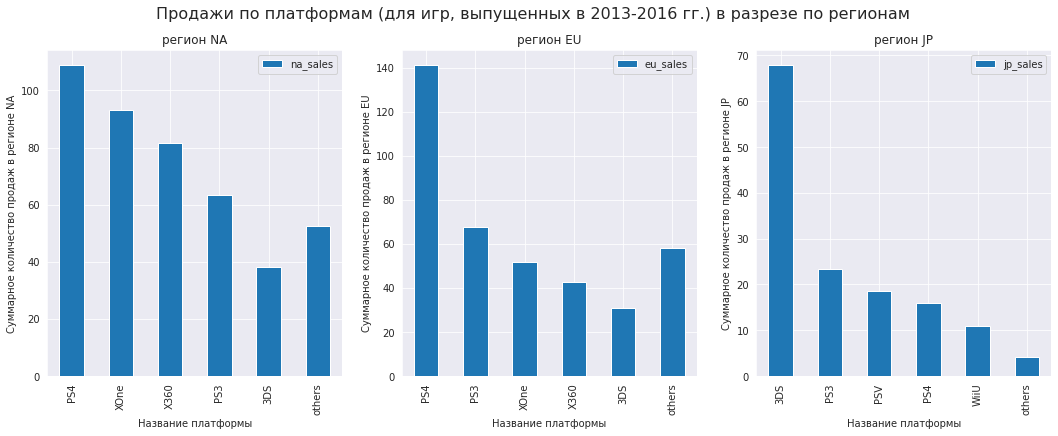

Text(0.5, 1.0, 'регион JP')

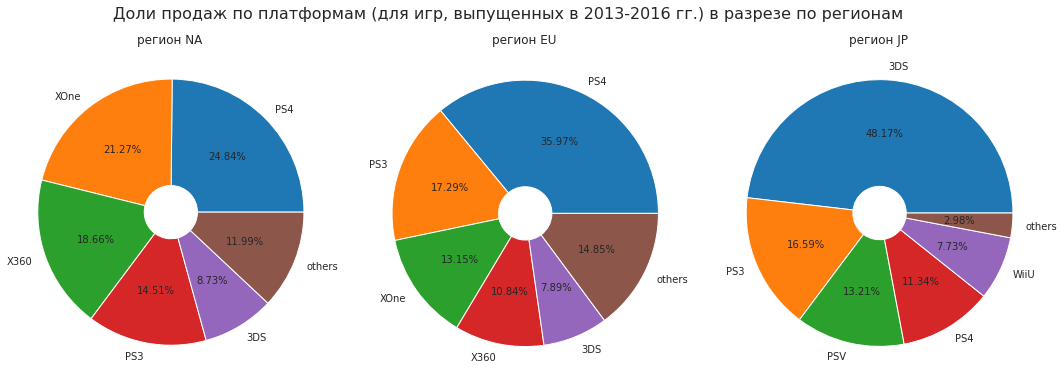

In [35]:
#Продажи самых популярных платформ (топ-5) для игр, выпущенных в 2013-2016 гг., в разрезе по регионам NA, EU, JP
f, ax = plt.subplots(1, 3, figsize=(18,6))
f.suptitle("Продажи по платформам (для игр, выпущенных в 2013-2016 гг.) в разрезе по регионам", \
           fontsize=16)

#Регион NA: Самые популярные платформы (топ-5) 
value_na=(df[['platform', 'year_of_release', 'na_sales']].query('year_of_release > 2012').pivot_table(index='platform', \
  values='na_sales', aggfunc = 'sum').sort_values(by = 'na_sales', ascending = False).reset_index())

#список top5
value_na_2 = value_na[:5].copy()

#список others
new_row_na = pd.DataFrame(data = {
    'platform' : ['others'],
    'na_sales' : [value_na['na_sales'][5:].sum()]
})

#добавляем строку others к top5
value_na_2 = pd.concat([value_na_2, new_row_na])

#строим диаграмму топ5
value_na_2.plot(x ='platform', y='na_sales', kind='bar', ax=ax[0])
ax[0].set_title('регион NA')
ax[0].set_ylabel('Суммарное количество продаж в регионе NA')
ax[0].set_xlabel('Название платформы')

#Регион EU: Самые популярные платформы (топ-5) 
value_eu=(df[['platform', 'year_of_release', 'eu_sales']].query('year_of_release > 2012').pivot_table(index='platform', \
  values='eu_sales', aggfunc = 'sum').sort_values(by = 'eu_sales', ascending = False).reset_index())

#список top5
value_eu_2 = value_eu[:5].copy()

#список others
new_row_eu = pd.DataFrame(data = {
    'platform' : ['others'],
    'eu_sales' : [value_eu['eu_sales'][5:].sum()]
})

#добавляем строку others к top5
value_eu_2 = pd.concat([value_eu_2, new_row_eu])


#строим диаграмму топ5
value_eu_2.plot(x ='platform', y='eu_sales', kind='bar', ax=ax[1])     
ax[1].set_title('регион EU')
ax[1].set_ylabel('Суммарное количество продаж в регионе EU')
ax[1].set_xlabel('Название платформы')


#Регион JP: Самые популярные платформы (топ-5) 
value_jp=(df[['platform', 'year_of_release', 'jp_sales']].query('year_of_release > 2012').pivot_table(index='platform', \
  values='jp_sales', aggfunc = 'sum').sort_values(by = 'jp_sales', ascending = False).reset_index())

#список top5
value_jp_2 = value_jp[:5].copy()

#список others
new_row_jp = pd.DataFrame(data = {
    'platform' : ['others'],
    'jp_sales' : [value_jp['jp_sales'][5:].sum()]
})

#добавляем строку others к top5
value_jp_2 = pd.concat([value_jp_2, new_row_jp])

#строим диаграмму топ5
value_jp_2.plot(x ='platform', y='jp_sales', kind='bar', ax=ax[2])
ax[2].set_title('регион JP')
ax[2].set_ylabel('Суммарное количество продаж в регионе JP')
ax[2].set_xlabel('Название платформы')

plt.show()

#_______________________________________________________________________________________________________
#
#Сделаем круговые диаграммы долей продаж для топ5 платформ  с разбивкой по 3 регионам: NA, EU, JP.
f, ax = plt.subplots(1, 3, figsize=(18,6))
f.suptitle("Доли продаж по платформам (для игр, выпущенных в 2013-2016 гг.) в разрезе по регионам", fontsize=16)

#Регион NA: Доли  продаж по платформам для игр, выпущенных в 2013-2016 гг. 
#строим круговую диаграмму
ax[0].pie(value_na_2['na_sales'],labels=value_na_2['platform'], autopct='%.2f%%', wedgeprops=dict(width=0.8))
ax[0].axis('equal')
ax[0].set_title('регион NA')

#Регион EU: Доли продаж по платформам для игр, выпущенных в 2013-2016 гг. 
#строим круговую диаграмму
ax[1].pie(value_eu_2['eu_sales'],labels=value_eu_2['platform'], autopct='%.2f%%', wedgeprops=dict(width=0.8))
ax[1].axis('equal')
ax[1].set_title('регион EU')

#Регион JP: Доли продаж по платформам для игр, выпущенных в 2013-2016 гг. 
#строим круговую диаграмму
ax[2].pie(value_jp_2['jp_sales'],labels=value_jp_2['platform'], autopct='%.2f%%', wedgeprops=dict(width=0.8))
ax[2].axis('equal')
ax[2].set_title('регион JP')

Самые популярные платформы (ТОП-5) в разрезе регионов (NA, EU, JP):  
 - NA: PS4, XOne, X360, PS3, 3DS. Первые три платформы имеют почти равные продажи, но PS4 чуть впереди.  
 - EU: PS4, PS3, XOne, X360, 3DS. Явный лидер PS4, затем идет PS3.  
 -JP: 3DS, PS3, PSV, PS4, WiiU. Явный лидер 3DS. Остальные сильно отстают. Это сильно отличается от структуры глобальных продаж.   
  
  
Самая популярная платформа PS4 наиболее популярна в регионах NA и EU и значительно уступает платформе 3DS в JP.   
Продажи в натуральном выражении лидирующей платформы в регионе EU заметно выше, чем продажи лидирующих платформ в других регионах.

**4.2. Выделим самые популярные жанры (топ-5) по регионам**

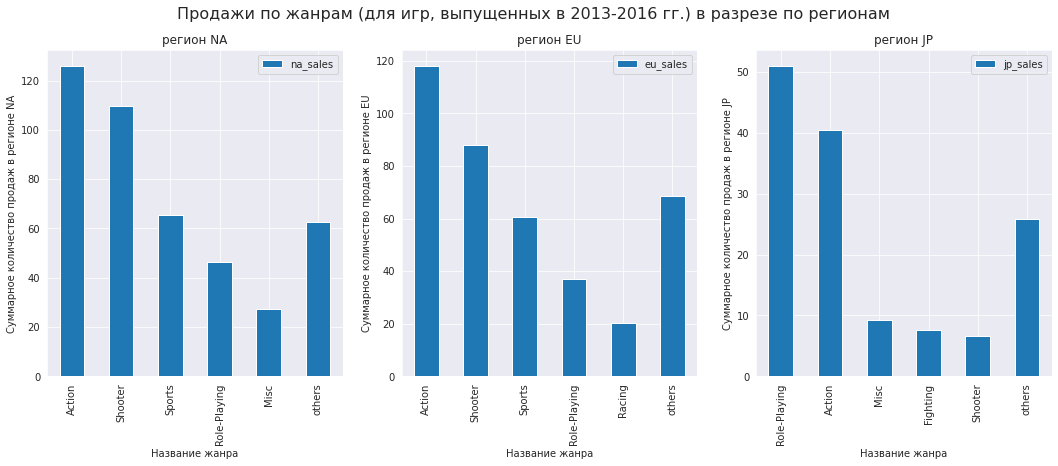

Text(0.5, 1.0, 'регион JP')

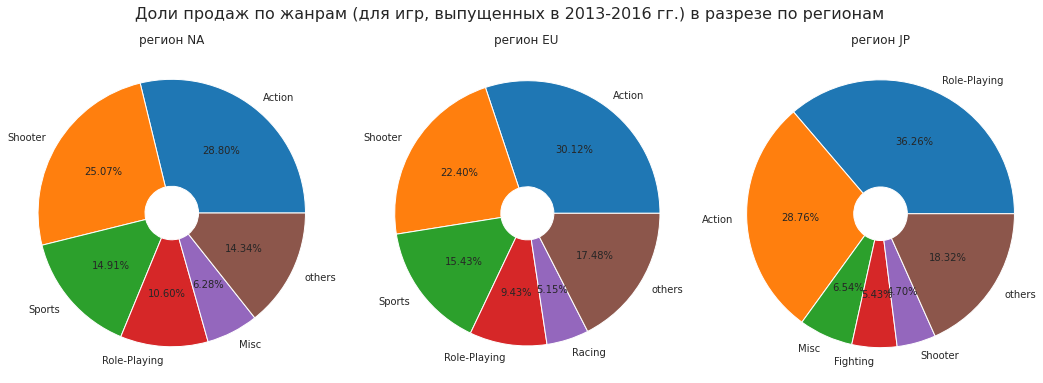

In [36]:
#Продажи самых популярных жанров (топ-5) для игр, выпущенных в 2013-2016 гг., в разрезе по регионам NA, EU, JP
f, ax = plt.subplots(1, 3, figsize=(18,6))
f.suptitle("Продажи по жанрам (для игр, выпущенных в 2013-2016 гг.) в разрезе по регионам", \
           fontsize=16)

#Регион NA: Самые популярные жанры (топ-5) 
genre_na=(df[['genre', 'year_of_release', 'na_sales']].query('year_of_release > 2012').pivot_table(index='genre', \
  values='na_sales', aggfunc = 'sum').sort_values(by = 'na_sales', ascending = False).reset_index())

#список top5
genre_na_2 = genre_na[:5].copy()

#список others
new_row_nag = pd.DataFrame(data = {
    'genre' : ['others'],
    'na_sales' : [genre_na['na_sales'][5:].sum()]
})

#добавляем строку others к top5
genre_na_2 = pd.concat([genre_na_2, new_row_nag])

#строим диаграмму топ5
genre_na_2.plot(x ='genre', y='na_sales', kind='bar', ax=ax[0])
ax[0].set_title('регион NA')
ax[0].set_ylabel('Суммарное количество продаж в регионе NA')
ax[0].set_xlabel('Название жанра')

#Регион EU: Самые популярные жанры (топ-5) 
genre_eu=(df[['genre', 'year_of_release', 'eu_sales']].query('year_of_release > 2012').pivot_table(index='genre', \
  values='eu_sales', aggfunc = 'sum').sort_values(by = 'eu_sales', ascending = False).reset_index())

#список top5
genre_eu_2 = genre_eu[:5].copy()

#список others
new_row_eug = pd.DataFrame(data = {
    'genre' : ['others'],
    'eu_sales' : [genre_eu['eu_sales'][5:].sum()]
})

#добавляем строку others к top5
genre_eu_2 = pd.concat([genre_eu_2, new_row_eug])


#строим диаграмму топ5
genre_eu_2.plot(x ='genre', y='eu_sales', kind='bar', ax=ax[1])     
ax[1].set_title('регион EU')
ax[1].set_ylabel('Суммарное количество продаж в регионе EU')
ax[1].set_xlabel('Название жанра')


#Регион JP: Самые популярные жанры (топ-5) 
genre_jp=(df[['genre', 'year_of_release', 'jp_sales']].query('year_of_release > 2012').pivot_table(index='genre', \
  values='jp_sales', aggfunc = 'sum').sort_values(by = 'jp_sales', ascending = False).reset_index())

#список top5
genre_jp_2 = genre_jp[:5].copy()

#список others
new_row_jpg = pd.DataFrame(data = {
    'genre' : ['others'],
    'jp_sales' : [genre_jp['jp_sales'][5:].sum()]
})

#добавляем строку others к top5
genre_jp_2 = pd.concat([genre_jp_2, new_row_jpg])

#строим диаграмму топ5
genre_jp_2.plot(x ='genre', y='jp_sales', kind='bar', ax=ax[2])
ax[2].set_title('регион JP')
ax[2].set_ylabel('Суммарное количество продаж в регионе JP')
ax[2].set_xlabel('Название жанра')

plt.show()

#_______________________________________________________________________________________________________
#
#Сделаем круговые диаграммы долей продаж для топ5 жанров с разбивкой по 3 регионам: NA, EU, JP.
f, ax = plt.subplots(1, 3, figsize=(18,6))
f.suptitle("Доли продаж по жанрам (для игр, выпущенных в 2013-2016 гг.) в разрезе по регионам", fontsize=16)

#Регион NA: Доли  продаж по жанрам для игр, выпущенных в 2013-2016 гг. 
#строим круговую диаграмму
ax[0].pie(genre_na_2['na_sales'],labels=genre_na_2['genre'], autopct='%.2f%%', wedgeprops=dict(width=0.8))
ax[0].axis('equal')
ax[0].set_title('регион NA')

#Регион EU: Доли продаж по жанрам для игр, выпущенных в 2013-2016 гг. 
#строим круговую диаграмму
ax[1].pie(genre_eu_2['eu_sales'],labels=genre_eu_2['genre'], autopct='%.2f%%', wedgeprops=dict(width=0.8))
ax[1].axis('equal')
ax[1].set_title('регион EU')

#Регион JP: Доли продаж по жанрам для игр, выпущенных в 2013-2016 гг. 
#строим круговую диаграмму
ax[2].pie(genre_jp_2['jp_sales'],labels=genre_jp_2['genre'], autopct='%.2f%%', wedgeprops=dict(width=0.8))
ax[2].axis('equal')
ax[2].set_title('регион JP')

Самые популярные жанры (ТОП-5) в разрезе регионов (NA, EU, JP):  
 - NA: Action, Shooter, Sports, Role-Playing, Misc. Это полностью соответствует распределению глобальных продаж.
 - EU: Action, Shooter, Sports, Role-Playing, Racing. Здесь в пятерку вошел также жанр Racing.
 - JP: Role-Playing, Action, Misc, Fighting, Shooter. Набор популярных жанров отличается от структуры глобальных продаж.
 
 Во всех регионах в число самых популярных вошли жанры Action, Shooter, Role-Playing, популярность которых выше в регионах 
 NA и EU. В регионах NA и EU также популярны Sports, Racing, а в регионе JP - жанр Fighting.

**4.3. Выясним влияние рейтинга ESRB на продажи в отдельном регионе**

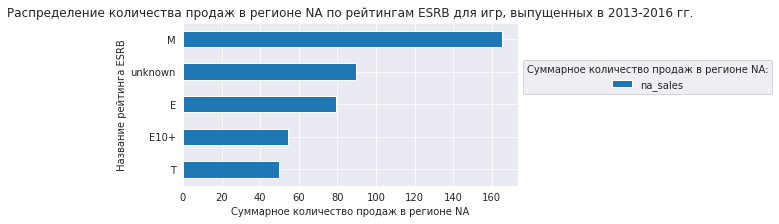

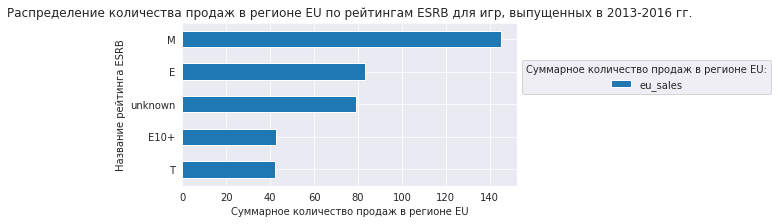

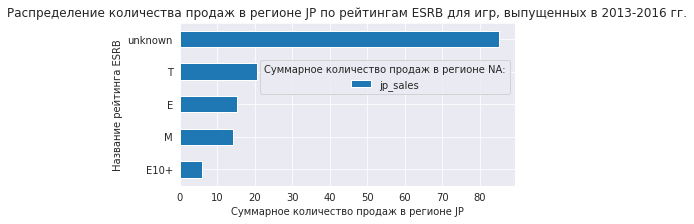

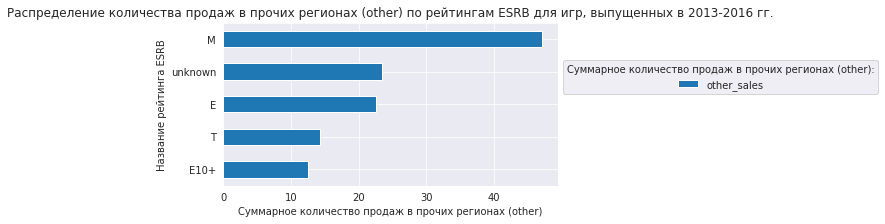

In [37]:
#Распределение продаж игр в зависимости от рейтинга для региона NA
df[['rating', 'year_of_release', 'na_sales']].query('(year_of_release > 2012)').\
   pivot_table(index='rating', values='na_sales', aggfunc = 'sum').sort_values(by = 'na_sales', ascending = True).tail()\
   .plot(kind='barh', figsize=(6, 3))
plt.title('Распределение количества продаж в регионе NA по рейтингам ESRB для игр, выпущенных в 2013-2016 гг.')
plt.xlabel('Суммарное количество продаж в регионе NA')
plt.ylabel('Название рейтинга ESRB')
plt.legend(bbox_to_anchor=(1, 0.8), title='Суммарное количество продаж в регионе NA:')
plt.show()

#Распределение продаж игр в зависимости от рейтинга для региона EU
df[['rating', 'year_of_release', 'eu_sales']].query('(year_of_release > 2012)').\
   pivot_table(index='rating', values='eu_sales', aggfunc = 'sum').sort_values(by = 'eu_sales', ascending = True).tail()\
   .plot(kind='barh', figsize=(6, 3))
plt.title('Распределение количества продаж в регионе EU по рейтингам ESRB для игр, выпущенных в 2013-2016 гг.')
plt.xlabel('Суммарное количество продаж в регионе EU')
plt.ylabel('Название рейтинга ESRB')
plt.legend(bbox_to_anchor=(1, 0.8), title='Суммарное количество продаж в регионе EU:')
plt.show()


#Распределение продаж игр в зависимости от рейтинга для региона JP
df[['rating', 'year_of_release', 'jp_sales']].query('(year_of_release > 2012)').\
   pivot_table(index='rating', values='jp_sales', aggfunc = 'sum').sort_values(by = 'jp_sales', ascending = True).tail()\
   .plot(kind='barh', figsize=(6, 3))
plt.title('Распределение количества продаж в регионе JP по рейтингам ESRB для игр, выпущенных в 2013-2016 гг.')
plt.xlabel('Суммарное количество продаж в регионе JP')
plt.ylabel('Название рейтинга ESRB')
plt.legend(bbox_to_anchor=(1, 0.8), title='Суммарное количество продаж в регионе NA:')
plt.show()


#Распределение продаж игр в зависимости от рейтинга для прочих регионов (other)
df[['rating', 'year_of_release', 'other_sales']].query('(year_of_release > 2012)').\
   pivot_table(index='rating', values='other_sales', aggfunc = 'sum').sort_values(by = 'other_sales', ascending = True).tail()\
   .plot(kind='barh', figsize=(6, 3))
plt.title('Распределение количества продаж в прочих регионах (other) по рейтингам ESRB для игр, выпущенных в 2013-2016 гг.')
plt.xlabel('Суммарное количество продаж в прочих регионах (other)')
plt.ylabel('Название рейтинга ESRB')
plt.legend(bbox_to_anchor=(1, 0.8), title='Суммарное количество продаж в прочих регионах (other):')
plt.show()



Продажи игр в зависимости от присвоенного рейтинга ESRB по отдельным регионам:
- NA: Наибольшее количество продаж приходится на игры с рейтингом М («Для взрослых»: Материалы игры не подходят для лиц младше 
    17 лет.). Далее идут игры без рейтинга и игры с рейтингом Е («Для всех»: Содержание вполне подходит для всех возрастов.)
- EU: Наибольшее количество продаж приходится на игры с рейтингом М («Для взрослых»: Материалы игры не подходят для лиц младше 
    17 лет.). Далее идут игры с рейтингом Е («Для всех»: Содержание вполне подходит для всех возрастов) и игры без рейтинга.
- JP: Подавляющая часть продаж приходится на игры на игры без рейтинга. Можно сказать в данном регионе рейтинг не важен.
- Other: Наибольшее количество продаж приходится на игры с рейтингом М («Для взрослых»: Материалы игры не подходят для лиц младше 
    17 лет.). Далее идут игры без рейтинга и игры с рейтингом Е («Для всех»: Содержание вполне подходит для всех возрастов.)
    
Можно сказать, что во всем мире кроме региона JP (Япония), наиболее продаваемые игры имеют рейтинг М и E. Также достаточно 
много продается игр без рейтингов ESRB. А в Японии в основом продаваемые игры рейтинга ESRB не имеют, здесь он не важен, и, возможно, такие игры изначально не выпускались для Северной Америки.

**Подтитог по разделу 4.**  
- *```Самые популярные платформы (ТОП-5) в разрезе регионов (NA, EU, JP):```*

    NA: PS4, XOne, X360, PS3, 3DS. Первые три платформы имеют почти равные продажи, но PS4 чуть впереди.  
    EU: PS4, PS3, XOne, X360, 3DS. Явный лидер PS4, затем идет PS3.  
    JP: 3DS, PS3, PSV, PS4, WiiU. Явный лидер 3DS. Остальные сильно отстают. Это сильно отличается от структуры глобальных продаж.   
      
    Самая популярная платформа PS4 наиболее популярна в регионах NA и EU и значительно уступает платформе 3DS в JP.  
    Продажи лидирующей платформы в регионе EU заметно выше, чем продажи лидирующих платформ в других регионах.  
    
      
- *```Самые популярные жанры (ТОП-5) в разрезе регионов (NA, EU, JP):```*
 
    NA: Action, Shooter, Sports, Role-Playing, Misc. Это полностью соответствует распределению глобальных продаж.  
    EU: Action, Shooter, Sports, Role-Playing, Racing. Здесь в пятерку вошел также жанр Racing.  
    JP: Role-Playing, Action, Misc, Fighting, Shooter. Набор популярных жанров отличается от структуры глобальных продаж.  

    Во всех регионах в число самых популярных вошли жанры Action, Shooter, Role-Playing, популярность которых выше в регионах NA и EU. В регионах NA и EU также популярны Sports, Racing, а в регионе JP - жанр Fighting.  
    
      
- *```Продажи игр в зависимости от присвоенного рейтинга ESRB по отдельным регионам:```*  

    NA: Наибольшее количество продаж приходится на игры с рейтингом М («Для взрослых»: Материалы игры не подходят для лиц младше 17 лет.). Далее идут игры без рейтинга и игры с рейтингом Е («Для всех»: Содержание вполне подходит для всех возрастов.)  
    EU: Наибольшее количество продаж приходится на игры с рейтингом М («Для взрослых»: Материалы игры не подходят для лиц младше 17 лет.). Далее идут игры с рейтингом Е («Для всех»: Содержание вполне подходит для всех возрастов) и игры без рейтинга.  
    JP: Подавляющая часть продаж приходится на игры на игры без рейтинга. Можно сказать в данном регионе рейтинг не важен.  
    Other: Наибольшее количество продаж приходится на игры с рейтингом М («Для взрослых»: Материалы игры не подходят для лиц младше 17 лет.). Далее идут игры без рейтинга и игры с рейтингом Е («Для всех»: Содержание вполне подходит для всех возрастов.)  

    Можно сказать, что во всем мире кроме региона JP (Япония), наиболее продаваемые игры имеют рейтинг М и E. Также достаточно много продается игр без рейтингов ESRB. А в Японии в основом продаваемые игры рейтинга ESRB не имеют и здесь он не важен, и, возможно, такие игры изначально не выпускались для Северной Америки.   

### 5. Проверка гипотез.

*Проверим 2 гипотезы:*    

**Проверка гипотезы 1:** Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.  
 Н_0:  Средние пользовательские рейтинги платформы Xbox One равны средним пользовательским рейтингам платформы PC.  
 Н_1:  Средние пользовательские рейтинги платформы Xbox One не равны средним пользовательским рейтингам платформы PC.  

В данном случае нам необходимо проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам.  
Уровень значимости alpha примем в размере 5%.

In [38]:
# alpha - значение уровня значимости. Гипотеза не будет отвергнута, если p-value будет больше alpha.
alpha = 0.05

# results = вызов метода для проверки гипотезы. Берем данные актуального периода и для рейтинга более 0.
results = st.ttest_ind(
    df.query('(platform == "XOne")&(year_of_release > 2012)&(user_score > 0)')['user_score'], 
    df.query('(platform == "PC")&(year_of_release > 2012)&(user_score > 0)')['user_score'], equal_var = True)

# вывод значения p-value на экран 
print(results.pvalue)

# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


**Проверка гипотезы 2:** Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ.«спортивные соревнования») разные.    
 Н_0: Средние пользовательские рейтинги жанра Action равны средним пользовательским рейтингам жанра Sports.  
 Н_1: Средние пользовательские рейтинги жанра Action не равны средним пользовательским рейтингам жанра Sports.  

In [39]:
# alpha - значение уровня значимости. Гипотеза не будет отвергнута, если p-value будет больше alpha.
alpha = 0.05

# results = вызов метода для проверки гипотезы. Берем данные актуального периода и для рейтинга более 0.
results = st.ttest_ind(
    df.query('(genre == "Sports")&(year_of_release > 2012)&(user_score >= 0)')['user_score'], 
    df.query('(genre == "Action")&(year_of_release > 2012)&(user_score >= 0)')['user_score'], equal_var = True)

# вывод значения p-value на экран 
print(results.pvalue)

# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

1.0517832389140023e-27
Отвергаем нулевую гипотезу


**Гипотеза1 не отвергнута. По гипотезе2 нулевая гипотеза отвергнута и принимаем альтернативную гипотезу.**

Cравненим средние пользовательские рейтинги по платформам и жанрам для иллюстрации непротиворечивости двух ранее рассмотренных гипотез.

In [40]:
print('По гипотезе 1 проверяем равенство средних пользовательских рейтингов платформы Xbox One и платформы PC:')
print('Cредний пользовательский рейтинг платформы Xbox One: ', df.query('(platform == "XOne")\
       &(year_of_release > 2012)&(user_score >= 0)')['user_score'].median())
print('Cредний пользовательский рейтинг платформы PC: ', df.query('(platform == "PC")\
       &(year_of_release > 2012)&(user_score >= 0)')['user_score'].median())  
print('-'*100)
print('По гипотезе 2 проверяем отличие средних пользовательских рейтингов жанра Action и жанра Sports:')
print('Cредний пользовательский рейтинг жанра Action: ', df.query('(genre == "Action")\
       &(year_of_release > 2012)&(user_score >= 0)')['user_score'].median())
print('Cредний пользовательский рейтинг жанра Sports: ', df.query('(genre == "Sports")\
       &(year_of_release > 2012)&(user_score >= 0)')['user_score'].median())  

По гипотезе 1 проверяем равенство средних пользовательских рейтингов платформы Xbox One и платформы PC:
Cредний пользовательский рейтинг платформы Xbox One:  6.8
Cредний пользовательский рейтинг платформы PC:  6.8
----------------------------------------------------------------------------------------------------
По гипотезе 2 проверяем отличие средних пользовательских рейтингов жанра Action и жанра Sports:
Cредний пользовательский рейтинг жанра Action:  7.1
Cредний пользовательский рейтинг жанра Sports:  5.5


### 6. Общий вывод исследования.

<div style="border:solid Chocolate 2px; padding: 40px">
<b>Краткое резюме:</b><br>  

 Актуальный период анализа: 2013-2016гг.
- Самые прибыльные платформы:      1. PS4          2. XOne<br>
- Самые прибыльные жанры:          1. Shooter     2. Action<br>
- Самые продаваемые игры: <br>
     1."Grand Theft Auto V" (жанр Action)<br> 
     2."Call of Duty: Black Ops 3" (жанр Shooter),"Call of Duty: Ghosts"(жанр Shooter), "Minecraft"(жанр Misc)<br>  <p>  
    
- Платформа PS4 наиболее популярна: 1. В регионе EU (Европа)  2. В регионе NA (Северная Америка).   
    При этом PS4 значительно уступает платформе 3DS в JP (Япония).
    Продажи PS4 в регионе EU заметно выше, чем продажи лидирующих платформ в других регионах.
- Жанр Action очень популярен во всех регионах, тогда как Shooter популярен везде, кроме региона JP. Средняя платформа продаст игры в жанрах Action и Shooter в большем количестве, чем какие-либо другие игры в других жанрах.
- Во всем мире кроме региона JP (Япония), наиболее продаваемые игры имеют рейтинг М и E. Также достаточно много продается игр без рейтингов ESRB. В Японии игры чаще рейтинга ESRB не имеют.
- Намного важнее получить оценки критиков, чем оценки пользователей, которые на продажи не влияют.
</br>
Не отвергнута гипотеза 1, что средние пользовательские рейтинги платформы Xbox One равны средним пользовательским рейтингам платформы PC.<br>
При проверке второй гипотезы, принята альтернативная гипотеза, что средние пользовательские рейтинги жанра Action отличаются от средних пользовательских рейтингов жанра Sports.
 
</div>
<br>
<br>

***```Приложение 1. Полная детлизация по анализу.```***

**```1. При анализе исходных данных:```** 
- В исходном файле 16715 строк. Дубликатов нет.   
- В названиях столбцов заменены прописные буквы на строчные.  
- Количество строк в столбцах не совпадают, значит в столбцах name, year_of_release, genre, critic_score, user_score, rating есть пропуски. 
- Дубликаты строк не обнаружены.   
- Пропуски в столбцах name, genre заполнить никакими данными мы не сможем, поэтому такие строчки удалим.   
К тому же их немного - 2 строчки.-<font color='Blue'><b>
- Пропуски в столбце year_of_release также удалим, т.к. в анализе основной упор будем делать на год выпуска игры.</b></font><br>
- В толбце rating есть значение рейтинг K-A. Такое значение после 1998 года стало рейтингом E. Получается, что это одно и тоже и имеет смысл К-А заменить на Е. Кроме того, здесь же присутствует рейтинг RP, который не подразумевает никакой оценки, поэтому RP заменим на NaN. 
- Пропуски в стоблцах critic_score,user_score, заменим на -1, а пропуски в столбце rating заменим на unknown, что будет означать, что оценки или рейтинг не получены для данной игры. Заменить средними значениями такие строки не получится, их очень много и это исказит результаты анализа.
- В данных по sales есть несколько строк, которые сильно выделяются из общего массива данных.

**```2. Подготовка данных к дальнейшей работе:```** 
- После обработки данных осталось 16442 строки. 
- В столбце user_score значение tbd заменено на NaN, т.к. эта оценка относилась не только к последним годам выпуска игр,
а была в данных по всем годам.  
- удалены строки с пропусками year_of_release, т.к. их не более 1,6%. Для нашего анализа год выпуска игры будет участвовать практически во всех сортировках, и важно здесь не иметь пропусков. Тип данных сменили на int, т.к. данные целочисленные.<br>
- В столбце critic_score заменили пропуски значением -1, а тип данных сменили на int, т.к. данные целочисленные.
- В столбце user_score заменили пропуски значением -1, а тип данных сменили на float, т.к. могут быть дробные оценки.
- В столбце rating рейтинг 'RP' заменил на 'no_ESRB', т.к. преполагалось в дальнейшем рейтинг ESRB присвоить. Пропуски заменили на unknown. ESRB - это рейтинг для США и Канады. А значит пропуск не савязан с ошибкой заполнения данных. Возможно игры с пропущенными рейтингами не планировали получать рейтинг от ESRB, т.к. не выпускались для Северной Америки.</font>
- Добавили столбец sales с суммарными продажами каждой игры во всех регионах.
- Выявили одну игру с названием Madden NFL 13, у которой данные по 4 столбцам совпадают. Дополнительные данные из остальных столбцов отличаются только в данных по продажам в самых минимальных значениях, поэтому дубликат удалили.
- Выявлено по результатам визульного анализа аномальное значение для платформы DS за 1985 год. А по официальным данным платформа DS была запущена в 2004 году. Мы выяснили, что в наших данных за 1985 год указаны данные о продажах на платформе DS по региону JP для игры 'Strongest Tokyo University Shogi DS'. Запись по игре 'Strongest Tokyo University Shogi DS' только одна. Из открытых источников действительно указывается информация, что данная игра вышла именно в 1985 году и выпускалась на платформе DS. Мы понимаем, что если год выпуска не является ошибочным, то указание платформы DS - это ошибка. Исправить данную ошибку мы не можем, поэтому должны были бы название платформы (или год выпуска игры) сделать пропуском. Какого-либо существенного влияния на результаты анализа всего датасета удаление этой строки не окажет. Произвели удаление данной строки.</font>


**```3. Результаты исследовательского анализа данных по различным параметрам:```**
- Распределение продаж игр по годам приближено к нормальному со смещением влево. Наибольшую ценность имеют данные с 1994 года.  До 1994 года выпускалось очень мало игр по сравнению с тем, что было после 1994 года. Наибольшее количество игр в продаже     
было в 2008 году, а после 2011 года количество игр упало в 2 раза. 
</p>    

- Выделены наиболее успешные платформы по размеру продаж: PS2, X360, PS3, Wii, DS, PS, GBA, PS4, PSP, PC, 3DS, XB, GB, NES, N64, SNES, GC, XOne, 2600, WiiU, PSV, SAT, GEN, DC. Наблюдаемое распредление срока жизни платформ напоминает пуасоновское распределение.  
Как видно из расчетных данных медиана среднего срока жизни платформы составляет 7 лет.    
Явные всплески продаж появлялись после выхода игр в 1998, 2004, 2009, 2015 годах, что позволяло получать наибольшую выручку по отрасли.   
Получается средний срок смены предпочтений (технологий/подходов) в отрасли 5-6 лет или 5,5 лет в среднем. Последняя популярная платформа PS4 начала свое восхождение в 2013 году, поэтому актуальный период был принят с 2013 года по текущий 2016 год.   
Весь последующий анализ поведен по играм, выпущенным начиная с 2013 года.   
На 2016 год имеем 31 платформу за 26 лет существования отрасли. Получается в среднем каждый год появлялась одна новая платформа
(31/26=1,19 шт.).    
</p>    

- Продажи по всем платформам падают в 2016 году по сравнению с 2015 годом. По играм, выпущенным в период 2013-2016 годов, продажи велись по следующим платофрмам в порядке убывания количества продаж: PS4, PS3, XOne, 3DS, X360, WiiU, PC, PSV, Wii, PSP, DS.  
Динамика количества игр на каждой из платформ в разрезе по годам выпуска игр показывает, что только на платформах PS4, XOne, PC имеется положительная динамика по количеству появляющихся новых игр. На остальных платформах наблюдаем снижение количества новых игр. При этом продажи на платформах PS4, XOne, 3DS по играм выпущенным в 2015 и 2016 годах, несмотря на падение продаж, намного опережают продажи всех остальных платформ.    <br>
    

- На диаграмме размаха для продаж игр на платформах можно увидеть, что  верхняя граница значимой части продаж на платформах PS4, X360, Wii, 
XOne сильно отличается от остальных платформ. Это означает, что на этих платформах гораздо больше игр с более высокими 
показателями продаж. Также эта группа платформ имеет более высокие показатели третьего квартиля, медианы продаж, чем другие 
платформы. <br>
Вторая группа платформ по размаху, третьему квартилю и медиане: WiiU, PS3. И затем идут все остальные платформы.   
В совокупности это значит, что в средняя игра на X360, XOne, PS4 продается в большем количестве, чем на других платформах.  Также можно отметить, что у многих платформ есть свои отдельные фавориты, которые имеют сильные выбросы в количестве продаж 
по отношению к основной массе игр. Особенно выделяется 1 игра на PS3 с продажами более 20 млн.копий, которая оказалась самой 
продаваемой среди всех остальных игр (2013-2016 гг.) на отдельно взятых платформах.  
Все выбросы лучше оставить, т.к. все эти данные важны для дальнейшей аналитики.  <br> 
<br>  
В итоге, если учитывать продажи игр последних лет, позитивную динамику количества игр на платформах, медианные значения продаж, и другие показатели диаграммы размаха, самыми перспективными и прибыльными платформами являются PS4 и XOne. 
</p>    
- Среди игр резко выделяются несколько мультиплатформенных игр, имеющих самые большие продажи: "Grand Theft Auto V" (жанр Action), "Call of Duty: Black Ops 3" (жанр Shooter), "Call of Duty: Ghosts"(жанр Shooter), "Minecraft"(жанр Misc), а также 2 моноплатформенных игры "Pokemon X/Pokemon Y"(жанр Role-Playing), "Pokemon Omega Ruby/Pokemon Alpha Sapphire" (жанр Role-Playing). 
<br>
      На диаграмме размаха для значений продаж игр по платформам можно увидеть, что верхняя граница значимой части продаж игр: "Grand Theft Auto V" (жанр Action), "Call of Duty: Black Ops 3" (жанр Shooter), "Call of Duty: Ghosts"(жанр Shooter), "Minecraft"(жанр Misc) сильно отличается от остальных игр. 
 Также эта группа игр имеет более высокие показатели третьего квартиля, медианы продаж, чем другие игры. Явным лидером выступает игра "Grand Theft Auto V" (жанр Action).<br>
    В совокупности это значит, что средняя платформа продаст игры "Grand Theft Auto V" (жанр Action), "Call of Duty: Black Ops 3" (жанр Shooter), "Call of Duty: Ghosts"(жанр Shooter), "Minecraft"(жанр Misc) в большем количестве, чем какие-либо другие игры.<br>
Также можно отметить, что выбросов значений продаж игр по платформам практически нет.<br>
    Игры "Pokemon X/Pokemon Y"(жанр Role-Playing) и "Pokemon Omega Ruby/Pokemon Alpha Sapphire"(жанр Role-Playing) являются 
моноплатформенными, поэтому ожидаемо медиана у этих игр расположено высоко. Однако это не имеет в данном срезе большого значения.

- Для платформы PS4: Рассчитан коэффициент корреляции отзывов пользователей и продаж в размере -0,03. Связь между отзывами пользователей и продажами отсутствует.
 Рассчитан коэффициент корреляции отзывов критиков и продаж в размере 0,41. Связь между отзывами пользователей и продажами средняя положительная.
Намного важнее получить оценки критиков, чем оценки пользователей, которые на продажи не влияют. <br>
 Получена итоговая сводная таблица расчитанных коэффициентов Пирсона по наиболее популярным платформам для определения корреляции между отзывами и продажами. <br> 
    Основанный на расчетах коэффициентов Пирсона вывод о том, что связь отзывов пользователей и продаж очень слабая, а связь отзывов критиков и продаж - средняя положительная, подтверждается для остальных платформ 'PS4','X360', 'XOne', '3DS', 'PS3', за исключением платформы 'WiiU', по которой корреляция отзывов пользователей и продаж в размере 0,42 оказалась средней положительной.
</p>   

- Наибольшее количество игр, выпущенных в 2013-2016 гг. находятся в следующих жанрах: Action, Role-Playing, Adventure, Misc, Shooter, Sports.
Наименее количество игр выпущено в жанрах: Pazzle, Racing, Platform, Strategy.  
</p>    

- Жанры с самыми высокими продажами для игр, выпущенных в 2013-2016 гг.: Action, Shooter, Sports, Role-Playing, Misc.
Жанры с самыми низкими продажами для игр, выпущенных в 2013-2016 гг.: Pazzle, Strategy, Simulation, Adventure, Fighting.

- Среди жанров резко выделяются два: жанр Action и жанр Shooter. </b>Вторая группа - жанр Role-Playing и жанр Sports.<br>
<br>
    На диаграмме размаха для значений продаж игр одного жанра по платформам можно увидеть, что верхняя граница значимой части продаж игр в жанрах: Action и Shooter сильно отличается от остальных игр. 
Также эта группа жанров игр имеет более высокие показатели третьего квартиля, медианы продаж, чем иры других жанров.  Медиана чуть выше у жанра Shooter.<br>
<b>В совокупности это значит, что средняя платформа продаст игры в жанрах Action и Shooter в большем количестве, чем какие-либо другие игры в других жанрах.</b>
Также можно отметить, что выбросов значений продаж игр одного жанра по платформам практически нет.<br>

    
    
**```4. Результаты изучения данных для составления портрета пользователя каждого региона (NA, EU, JP):```**

- *```Самые популярные платформы (ТОП-5) в разрезе регионов (NA, EU, JP):```*

    NA: PS4, XOne, X360, PS3, 3DS. Первые три платформы имеют почти равные продажи, но PS4 чуть впереди.  
    EU: PS4, PS3, XOne, X360, 3DS. Явный лидер PS4, затем идет PS3.  
    JP: 3DS, PS3, PSV, PS4, WiiU. Явный лидер 3DS. Остальные сильно отстают. Это сильно отличается от структуры глобальных продаж.   
      
    Самая популярная платформа PS4 наиболее популярна в регионах NA и EU и значительно уступает платформе 3DS в JP.  
    Продажи лидирующей платформы в регионе EU заметно выше, чем продажи лидирующих платформ в других регионах.  
    
      
- *```Самые популярные жанры (ТОП-5) в разрезе регионов (NA, EU, JP):```*
 
    NA: Action, Shooter, Sports, Role-Playing, Misc. Это полностью соответствует распределению глобальных продаж.  
    EU: Action, Shooter, Sports, Role-Playing, Racing. Здесь в пятерку вошел также жанр Racing.  
    JP: Role-Playing, Action, Misc, Fighting, Shooter. Набор популярных жанров отличается от структуры глобальных продаж.  

    Во всех регионах в число самых популярных вошли жанры Action, Shooter, Role-Playing, популярность которых выше в регионах NA и EU. В регионах NA и EU также популярны Sports, Racing, а в регионе JP - жанр Fighting.  
    
      
- *```Продажи игр в зависимости от присвоенного рейтинга ESRB по отдельным регионам:```*  

    NA: Наибольшее количество продаж приходится на игры с рейтингом М («Для взрослых»: Материалы игры не подходят для лиц младше 17 лет.). Далее идут игры без рейтинга и игры с рейтингом Е («Для всех»: Содержание вполне подходит для всех возрастов.)  
    EU: Наибольшее количество продаж приходится на игры с рейтингом М («Для взрослых»: Материалы игры не подходят для лиц младше 17 лет.). Далее идут игры с рейтингом Е («Для всех»: Содержание вполне подходит для всех возрастов) и игры без рейтинга.  
    JP: Подавляющая часть продаж приходится на игры на игры без рейтинга. Можно сказать в данном регионе рейтинг не важен.  
    Other: Наибольшее количество продаж приходится на игры с рейтингом М («Для взрослых»: Материалы игры не подходят для лиц младше 17 лет.). Далее идут игры без рейтинга и игры с рейтингом Е («Для всех»: Содержание вполне подходит для всех возрастов.)  

    Можно сказать, что во всем мире кроме региона JP (Япония), наиболее продаваемые игры имеют рейтинг М и E. Также достаточно много продается игр без рейтингов ESRB. А в Японии в основом продаваемые игры рейтинга ESRB не имеют, здесь он не важен, и, возможно, такие игры изначально не выпускались для Северной Америки.   

   
**```5. Результат проверки 2 гипотез:```** 

Сформулированы 2 гипотезы и альтернативные гипотезы к ним:  

    - Гипотеза 1:   
     Н_0: Средние пользовательские рейтинги платформы XboxOne равны средним пользовательским рейтингам платформы PC.  
     Н_1: Средние пользовательские рейтинги платформы XboxOne не равны средним пользовательским рейтингам платформы PC.  
   
    - Гипотеза 2:      
     Н_0: Средние пользовательские рейтинги жанра Action равны средним пользовательским рейтингам жанра Sports.  
     Н_1: Средние пользовательские рейтинги жанра Action не равны средним пользовательским рейтингам жанра Sports.  
    
В данном случае нам необходимо проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам.

*Гипотеза1 не отвергнута о том, что средние пользовательские рейтинги платформы Xbox One равны средним пользовательским рейтингам платформы PC.  
По гипотезе2 нулевая гипотеза отвергнута и принимаем альтернативную гипотезу. А именно: Средние пользовательские рейтинги жанра Action отличаются от средних пользовательских рейтингов жанра Sports.*  
  *Дополнительно приведено сравнение средних пользовательских рейтингов по платформам и жанрам для иллюстрации непротиворечивости двух рассмотренных гипотез.*  